In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./DATA/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df = df.dropna()

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [6]:
X = pd.get_dummies(df.drop('species', axis=1),drop_first=True)

In [7]:
y = df['species']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

In [12]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [13]:
preds = rfc.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

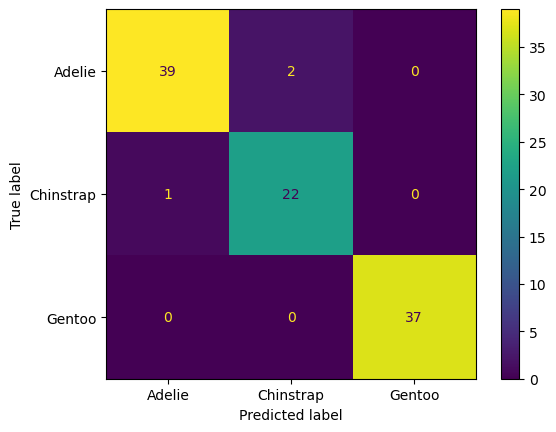

In [15]:
cm = confusion_matrix(y_test,preds, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()
plt.show()

In [16]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



## Random Forest Classification Level 2 (LEGEND)

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("./DATA/data_banknote_authentication.csv")

In [19]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


C:\Users\Muhammad Nasir\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


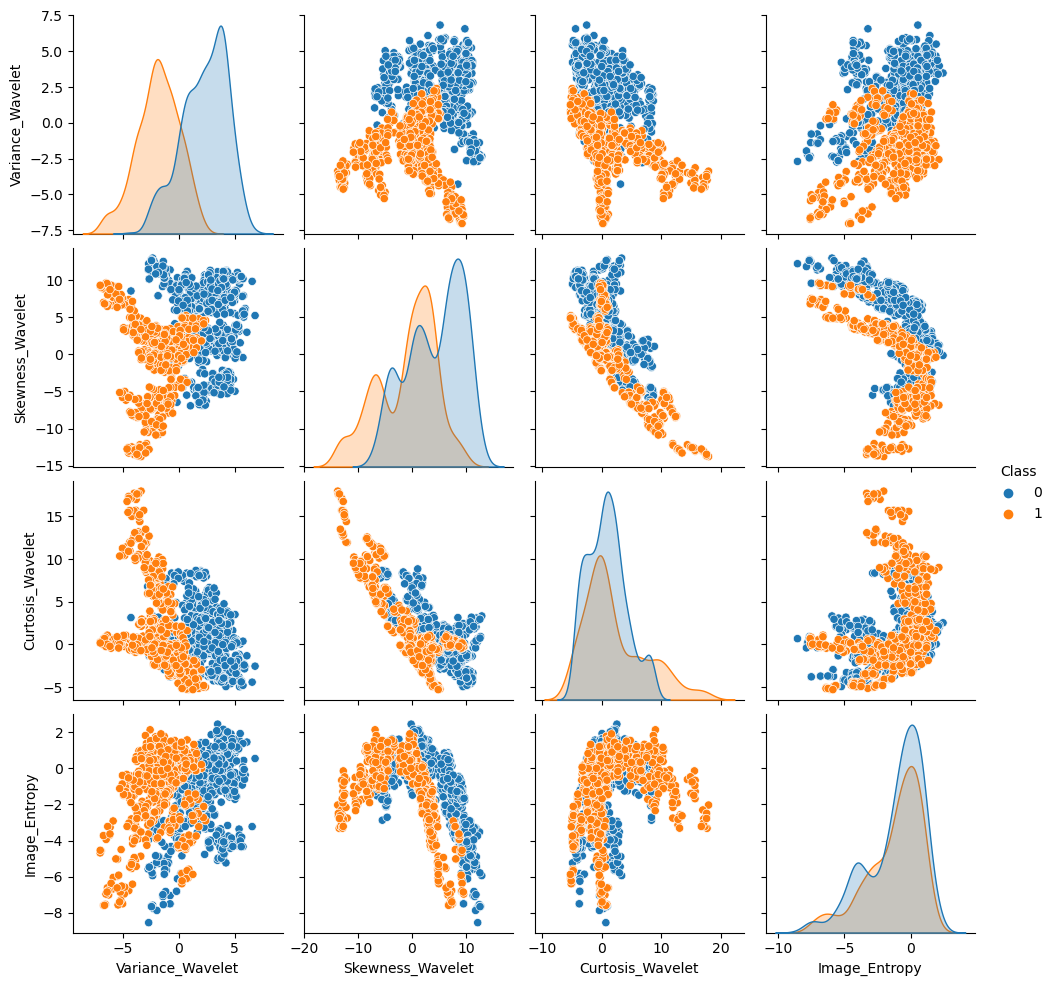

In [20]:
sns.pairplot(df,hue='Class')

In [21]:
X = df.drop('Class',axis=1)

In [22]:
y = df['Class']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
n_estimators = [64,100,128,200]

In [28]:
max_features = [2,3,4]

In [29]:
bootstrap = [True,False]

In [30]:
oob_score = [True,False]

In [31]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [32]:
rfc = RandomForestClassifier()

In [33]:
grid = GridSearchCV(rfc,param_grid)

In [34]:
grid.fit(X_train,y_train)

C:\Users\Muhammad Nasir\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Muhammad Nasir\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Muhammad Nasir\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Muhammad Nasir\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", l

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [35]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [36]:
rfc = RandomForestClassifier(max_features=2,n_estimators=200,oob_score=True)

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [38]:
rfc.oob_score_

0.9948542024013722

In [39]:
predictions = rfc.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix,accuracy_score

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



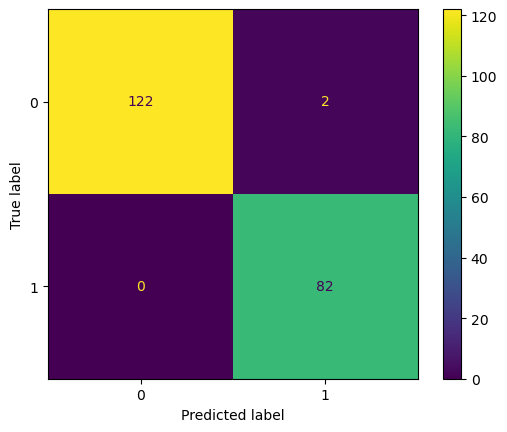

In [42]:
cm = confusion_matrix(y_test,predictions, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()
plt.show()

In [43]:
confusion_matrix(y_test,predictions)

array([[122,   2],
       [  0,  82]], dtype=int64)

In [44]:
errors = []
misclassifications = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    n_missed = np.sum(y_test != preds)
    
    errors.append(err)
    misclassifications.append(n_missed)

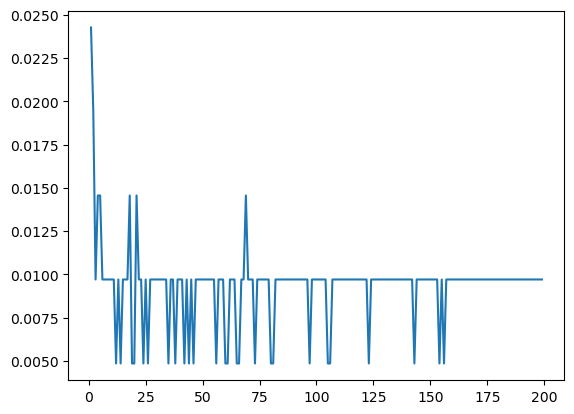

In [45]:
plt.plot(range(1,200),errors)

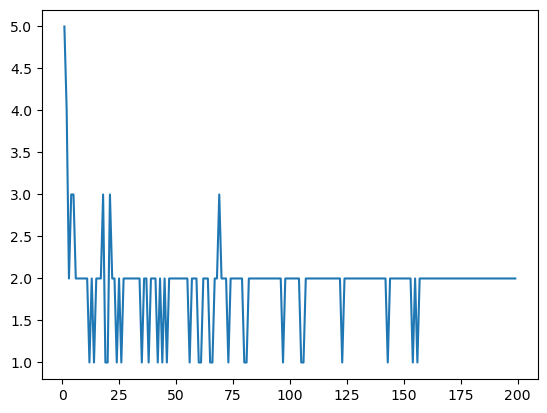

In [46]:
plt.plot(range(1,200),misclassifications)

### Testing of multiple model to test the one that best fit for this particular data.

## Starting with LINEAR REGRESSION.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [48]:
df = pd.read_csv('./DATA/rock_density_xray.csv')

In [49]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [50]:
df.columns = ['Signal','Density']

<Axes: xlabel='Signal', ylabel='Density'>

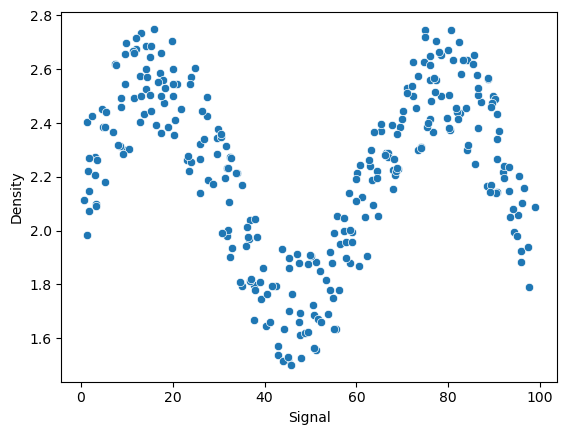

In [51]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [52]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr_model = LinearRegression()

In [57]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [58]:
lr_preds = lr_model.predict(X_test)

In [59]:
residual_error = y_test - lr_preds

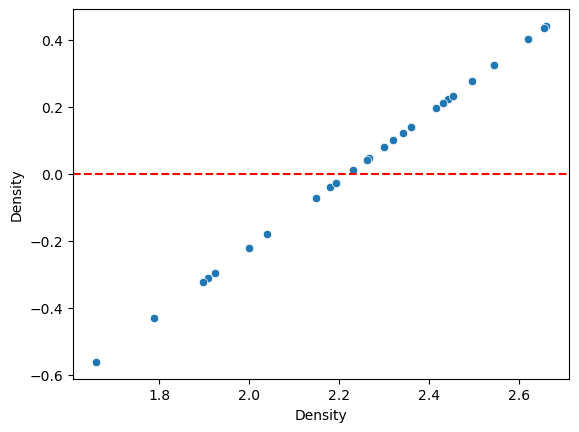

In [60]:
sns.scatterplot(x=y_test,y=residual_error)
plt.axhline(y=0,color='r',ls='--')

In [61]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [63]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [64]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [65]:
signal_range = np.arange(0,100)
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [66]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

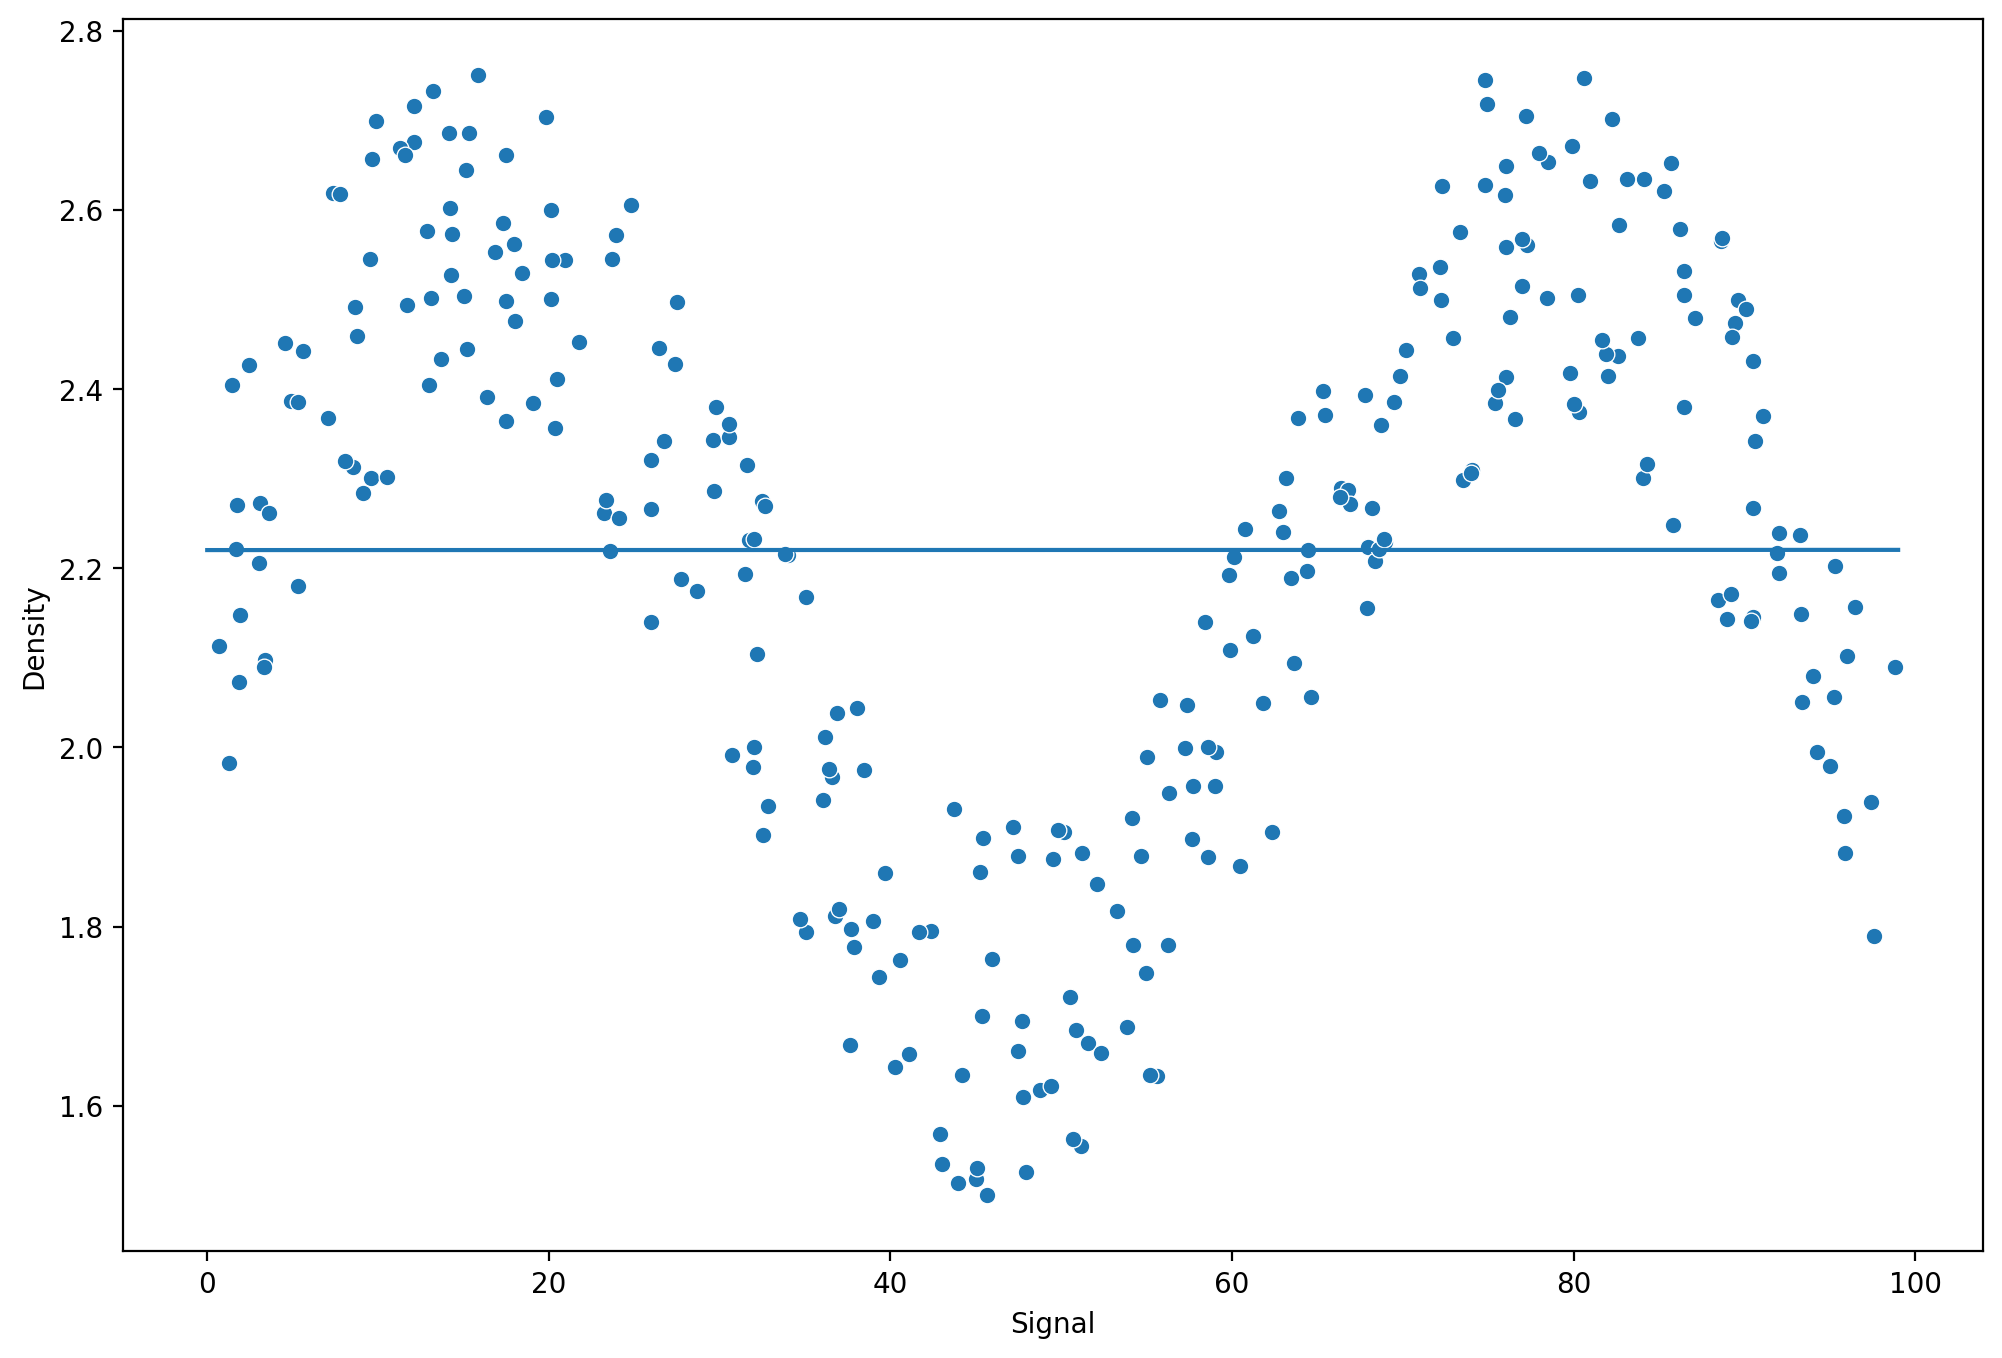

In [67]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

plt.plot(signal_range,signal_preds)

In [68]:
def run_model(model,X_train,y_train,X_test,y_test):
    # FIT MODEL TRAINING
    model.fit(X_train,y_train)
    # GET METRICS
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    # Plot results model signal range
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')

    plt.plot(signal_range,signal_preds)

MAE: 0.211198973318633
RMSE: 0.2570051996584629


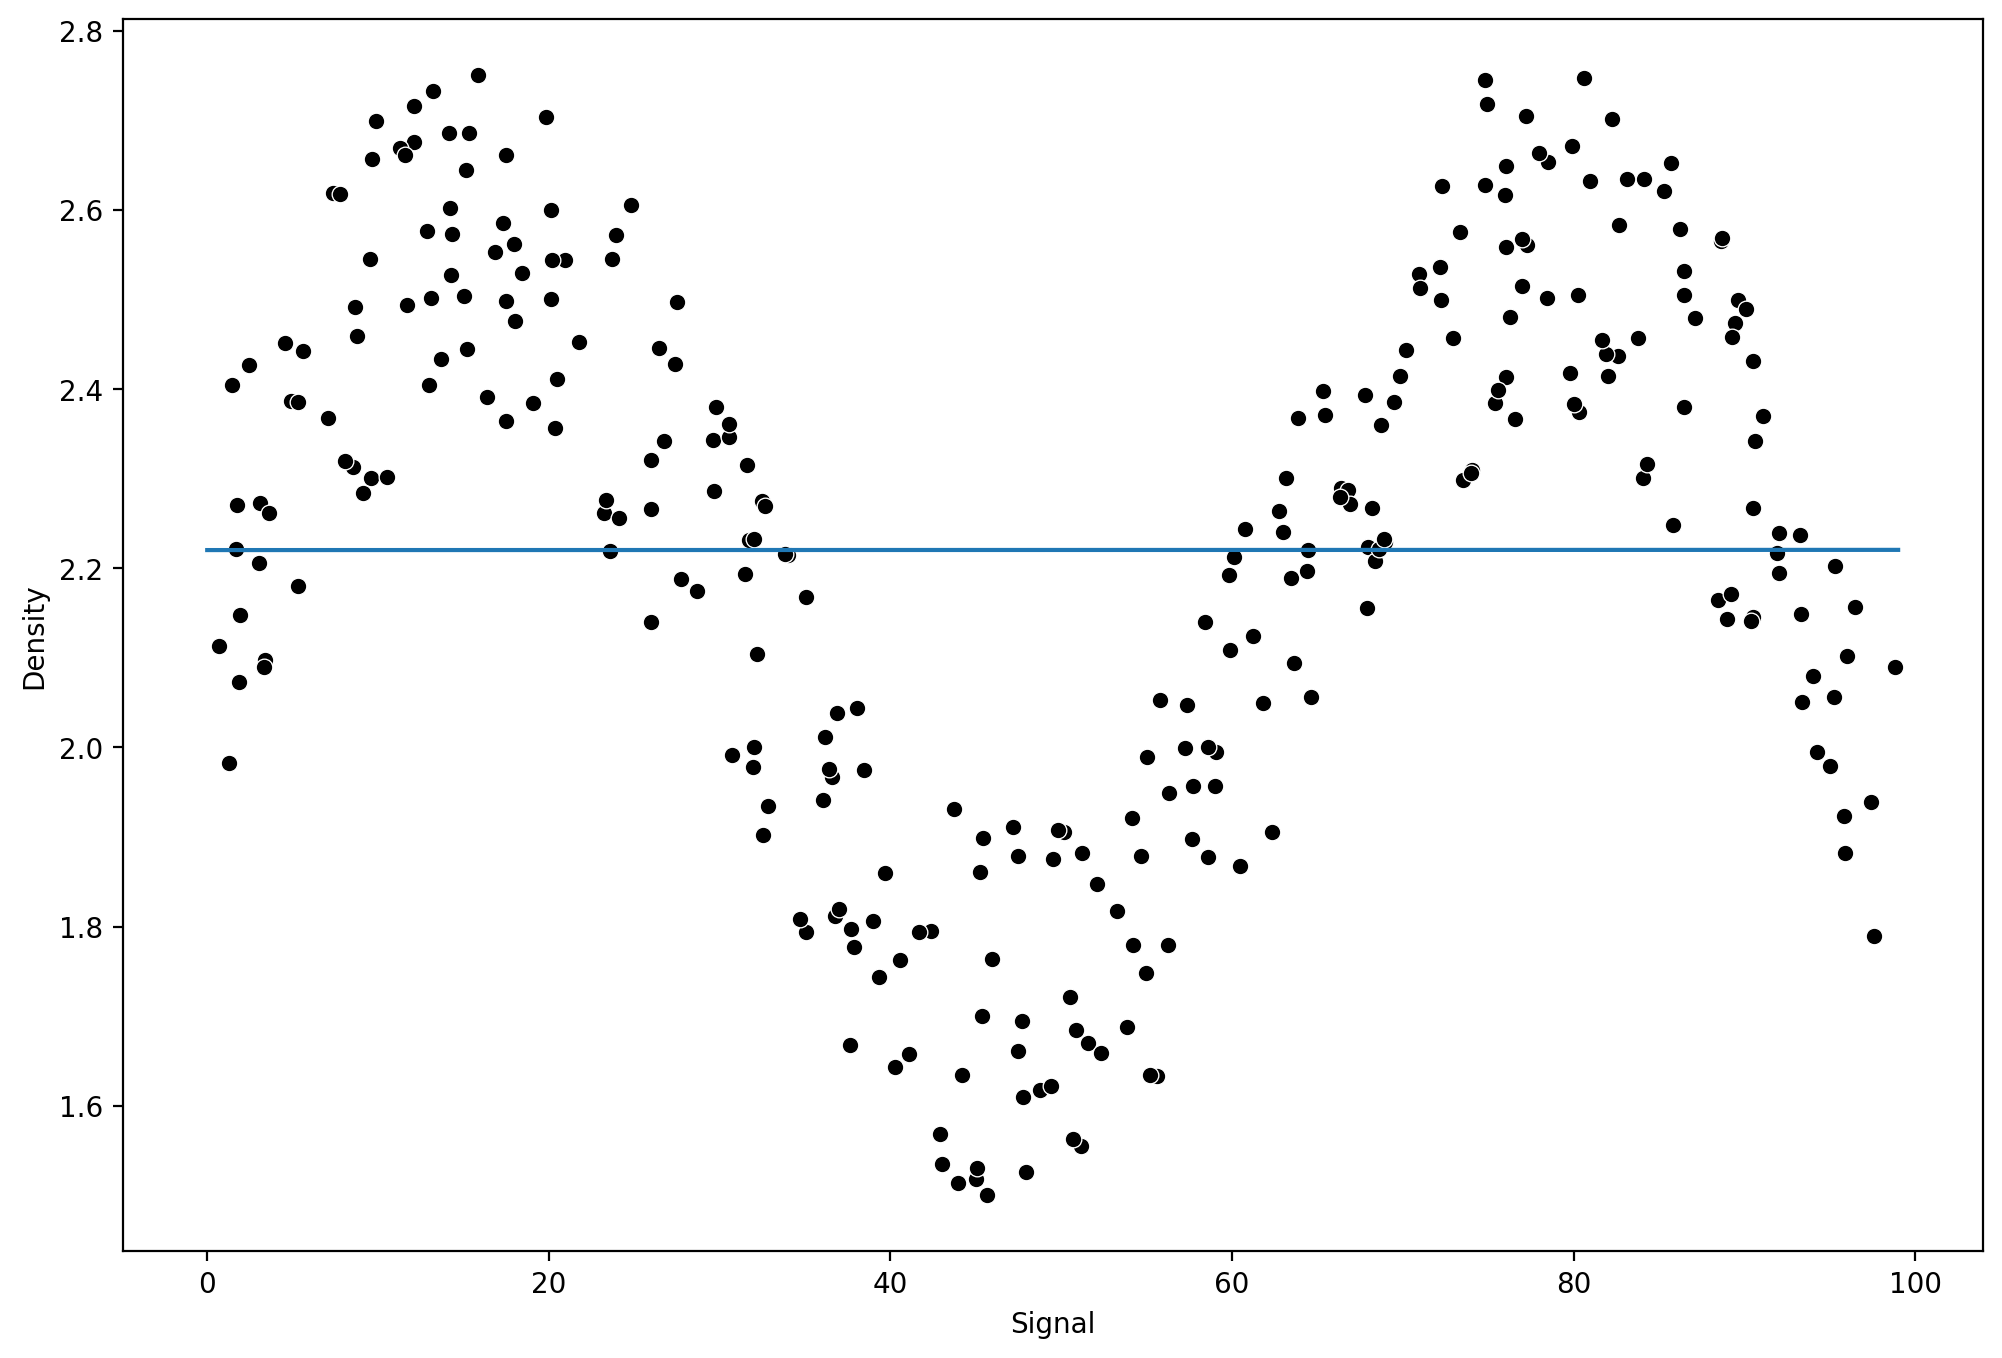

In [69]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [71]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE: 0.119690915641049
RMSE: 0.13807393264835693


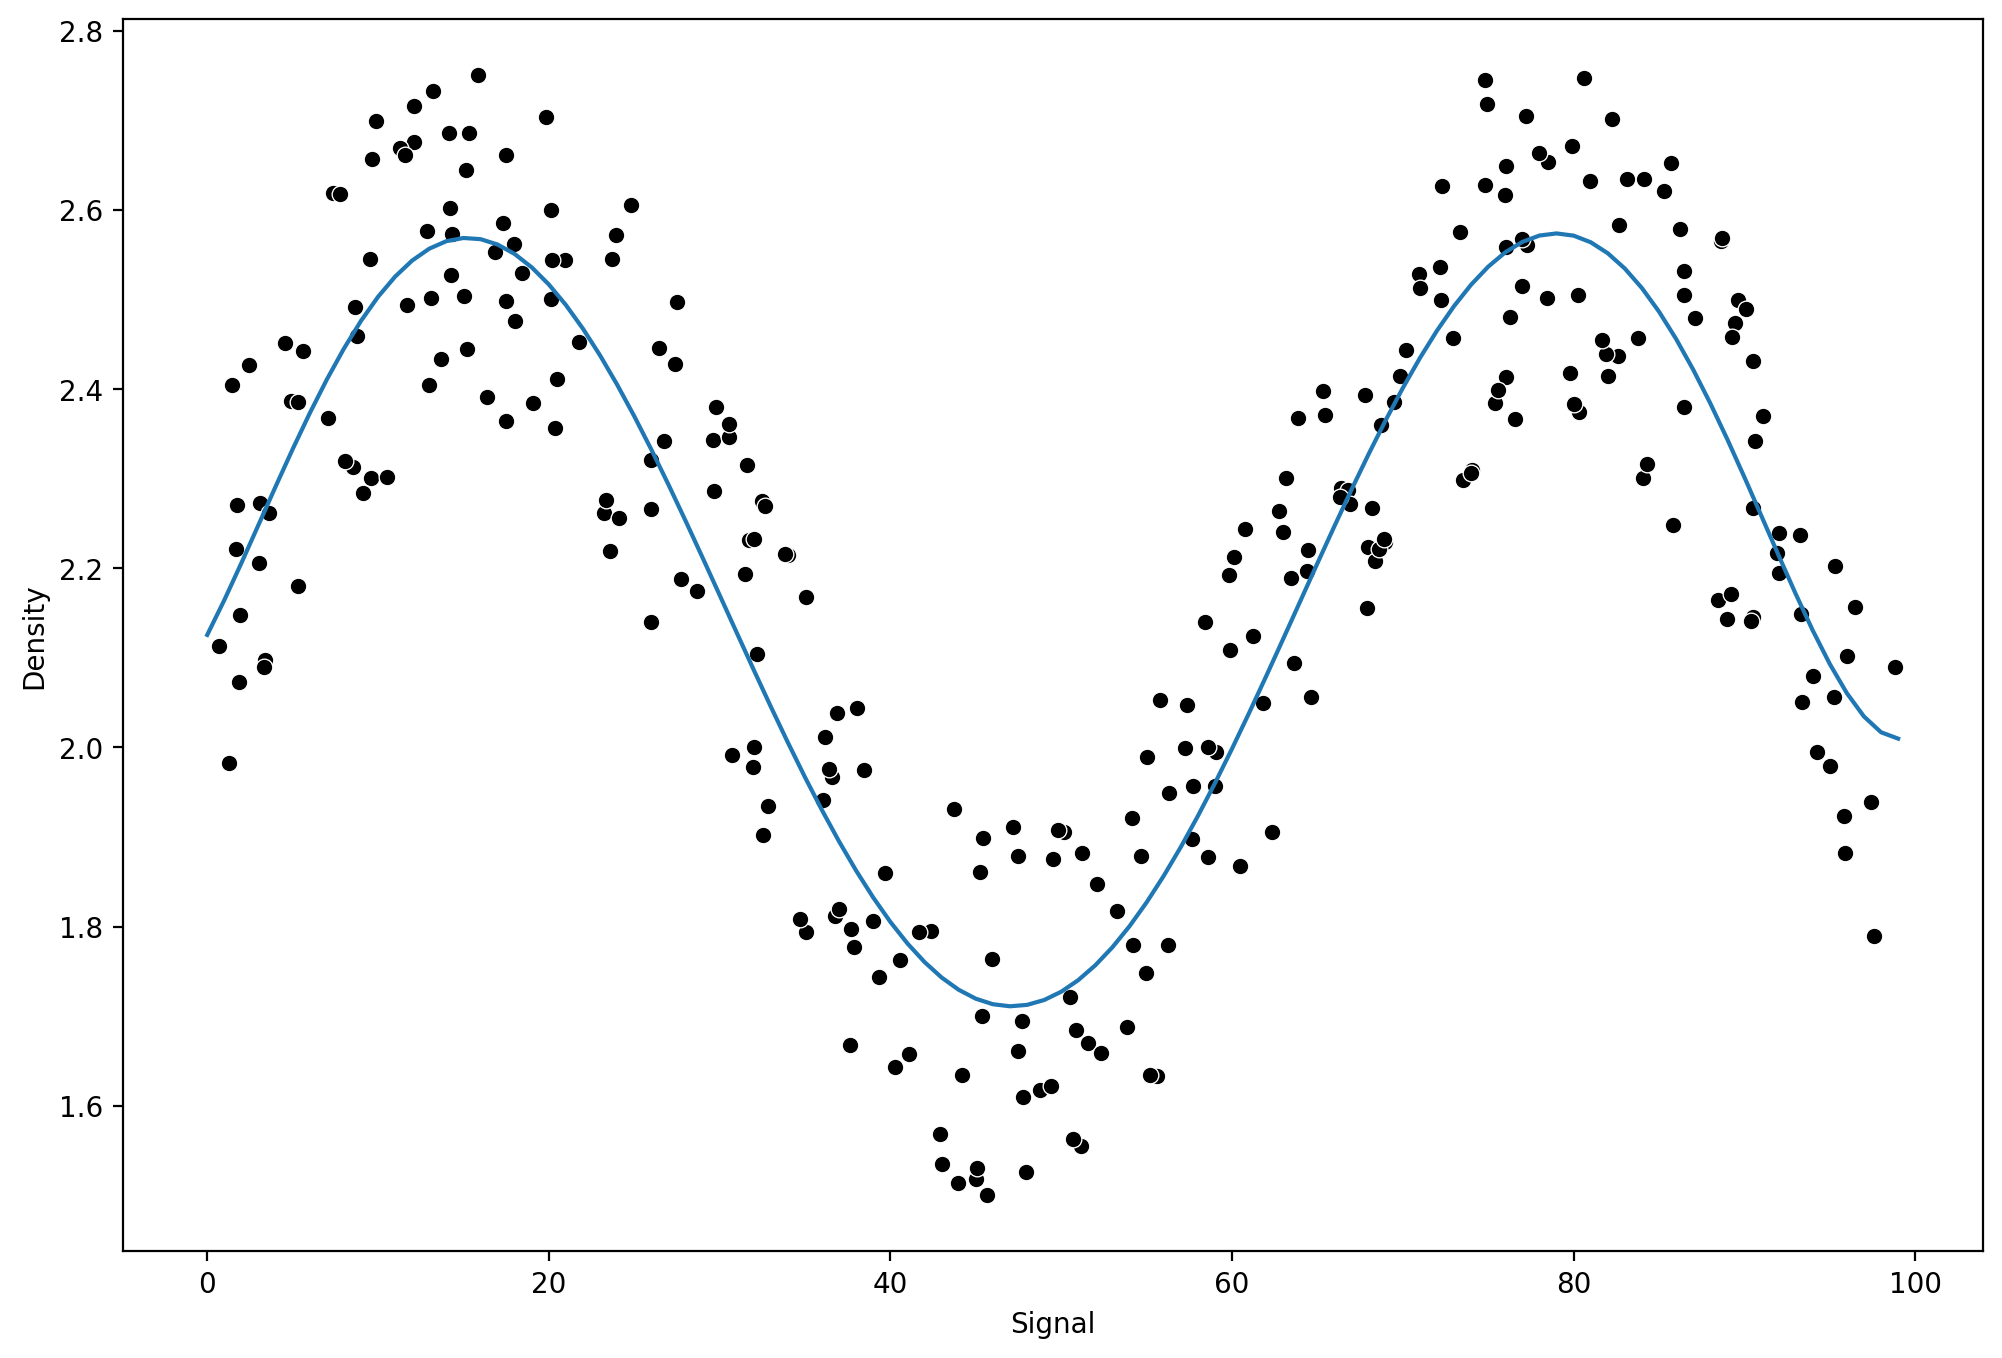

In [72]:
run_model(pipe,X_train,y_train,X_test,y_test)

## Using K-NN For Regression.

In [73]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926
MAE: 0.13363165935705318
RMSE: 0.15954234753677107


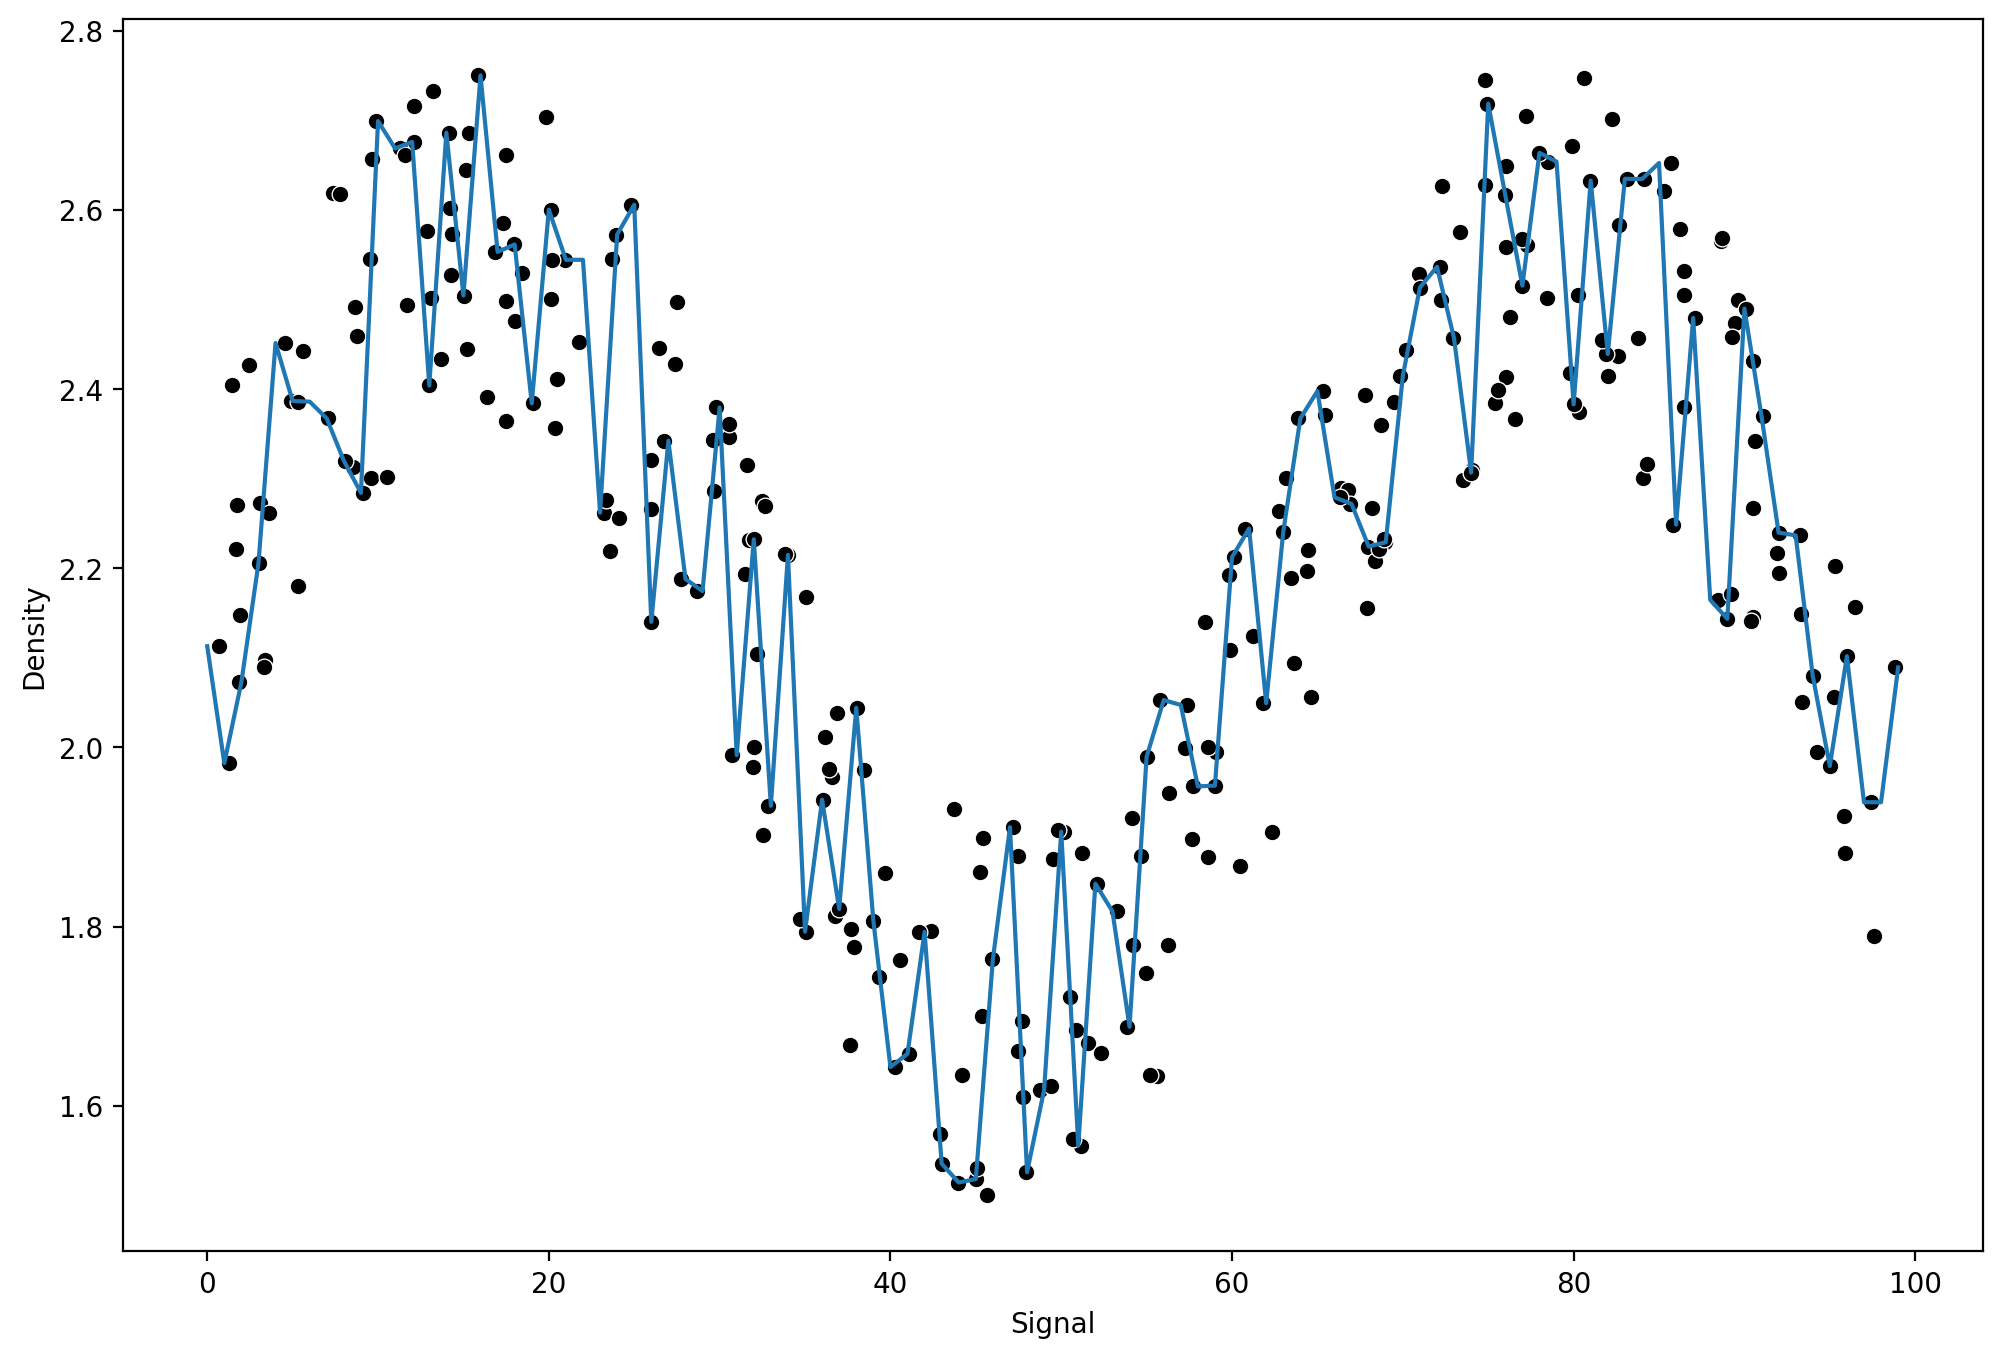

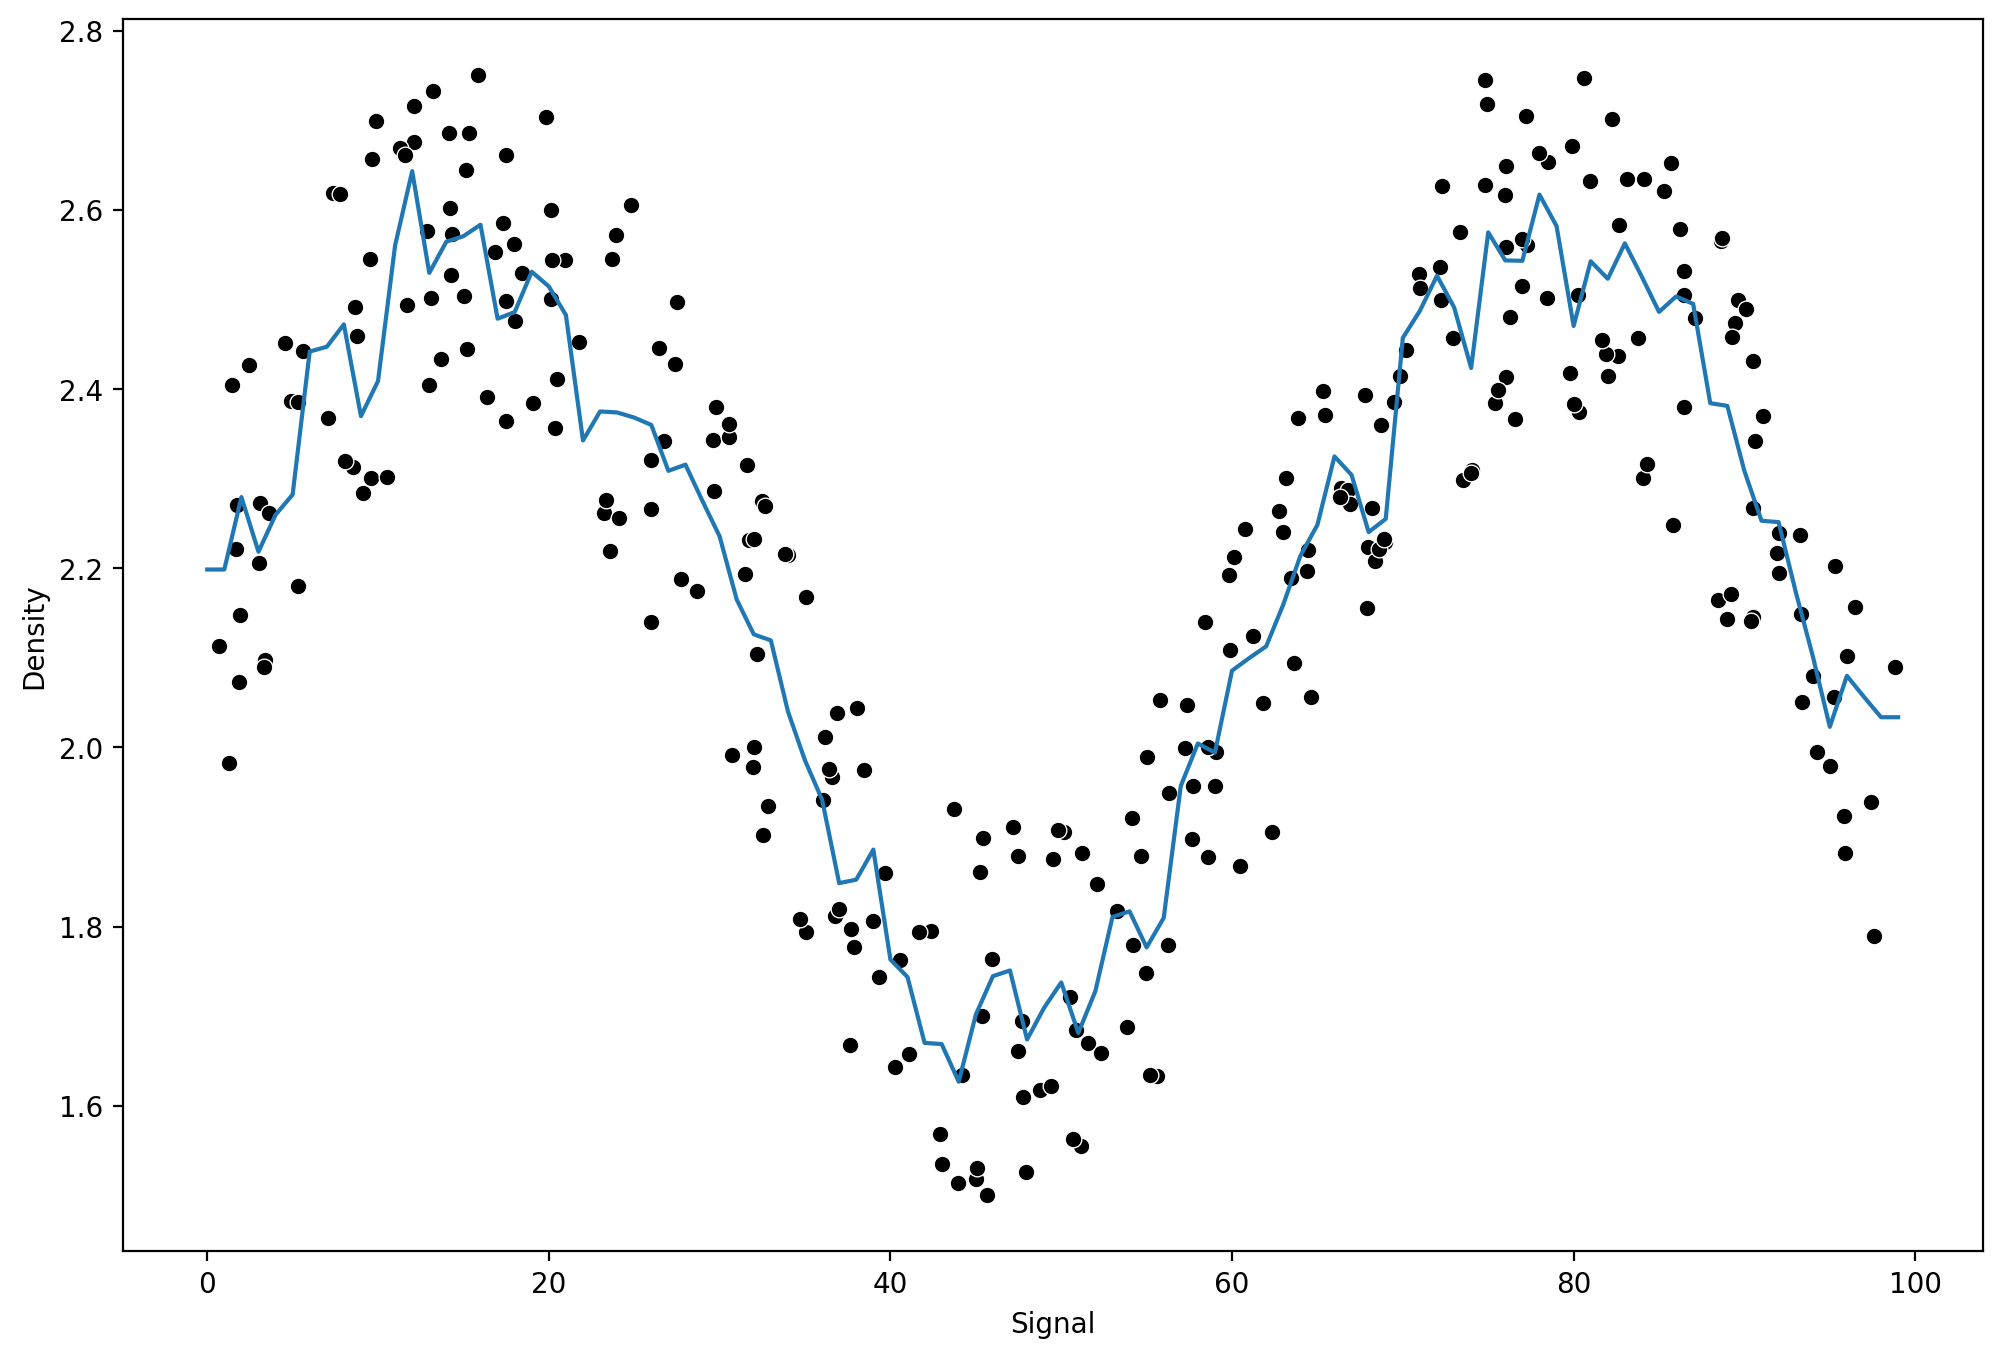

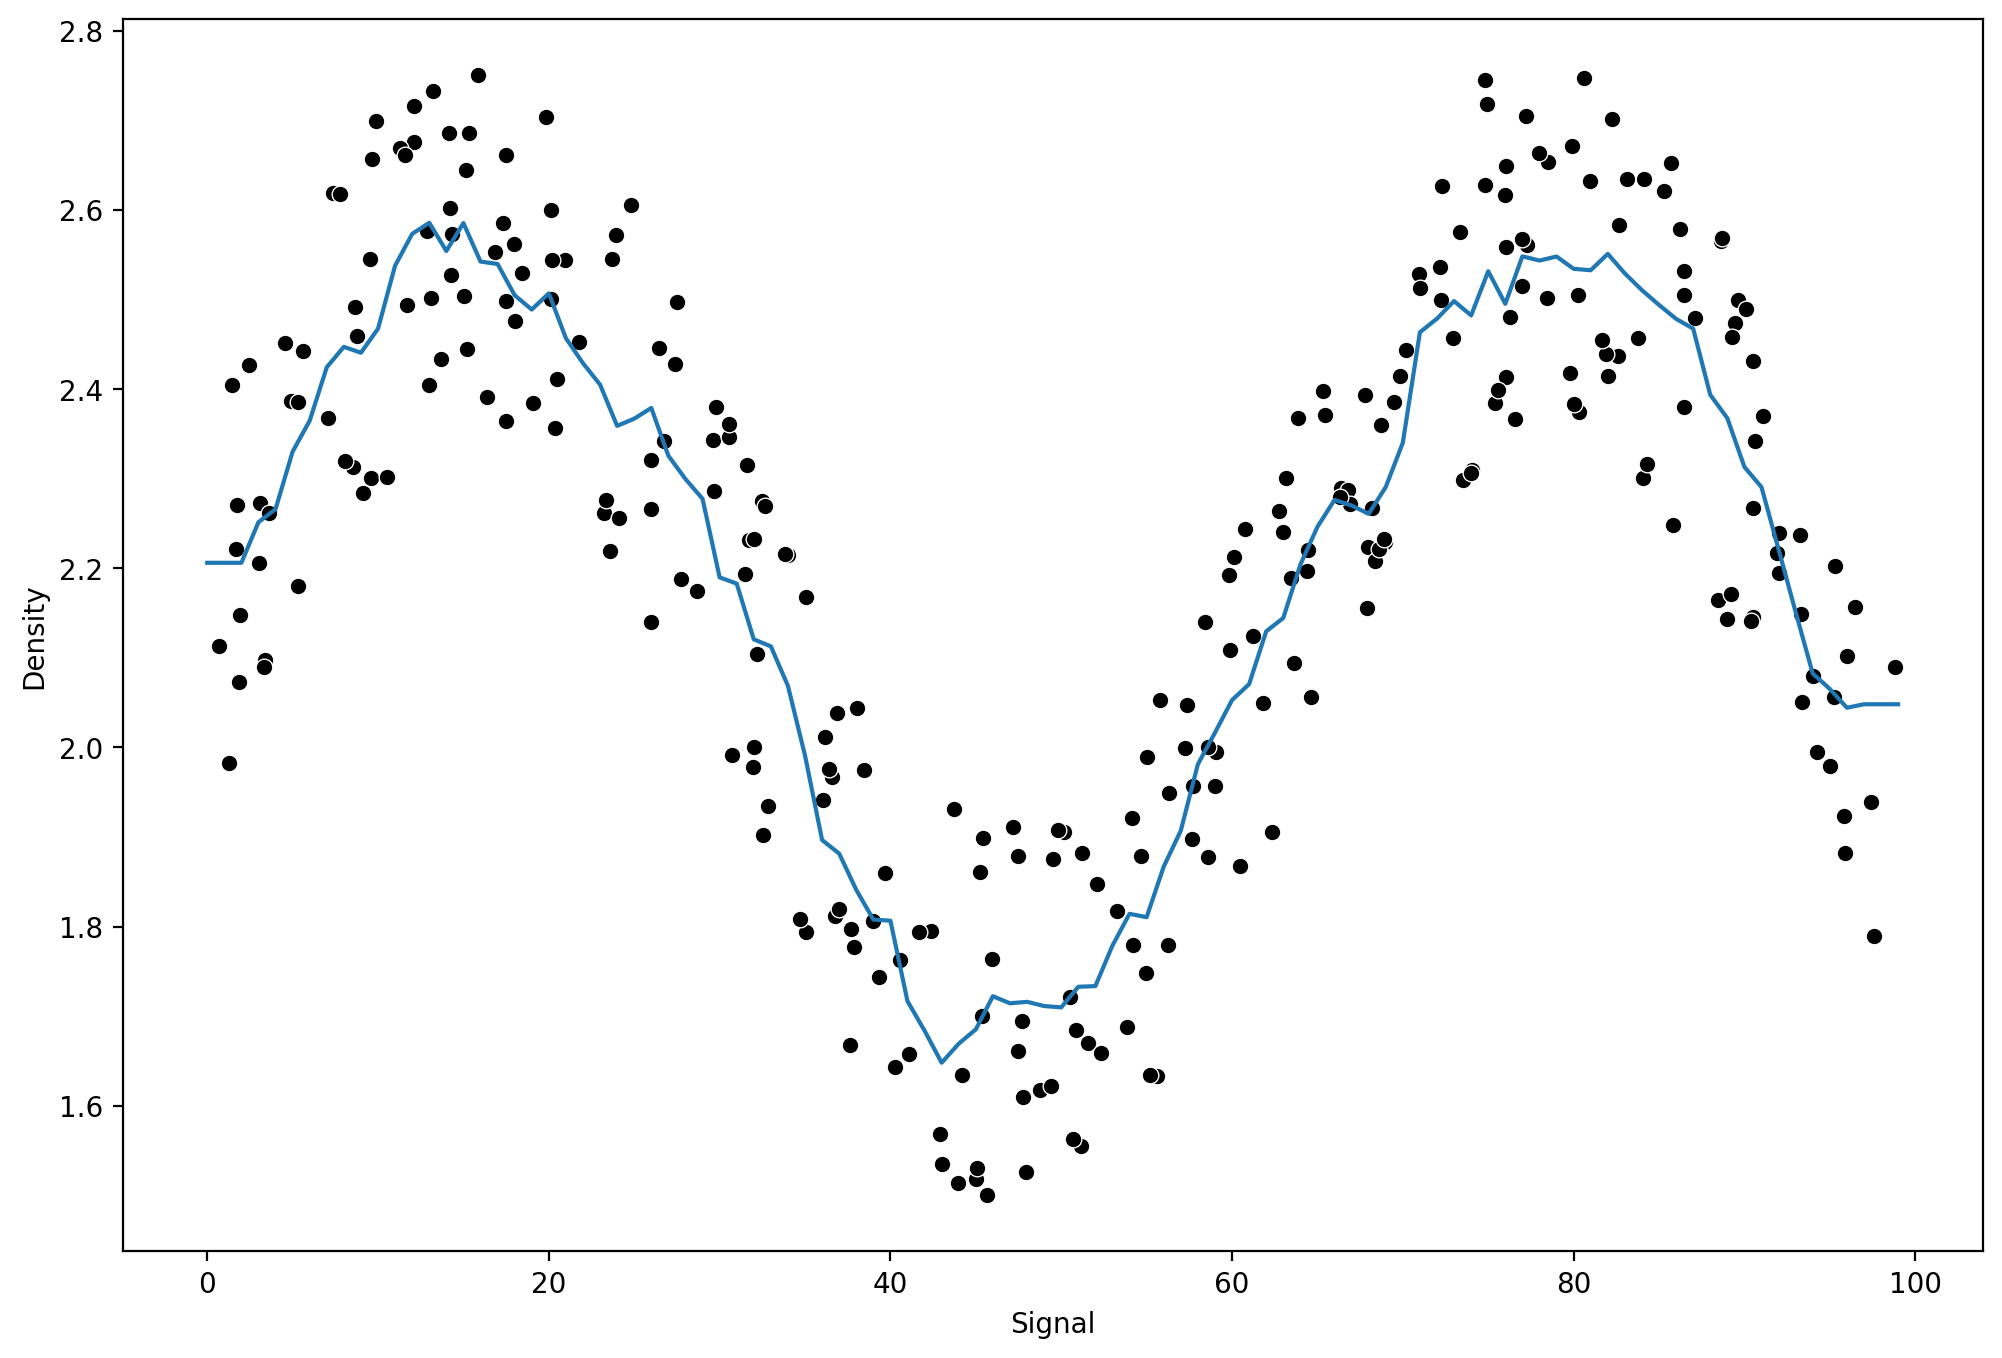

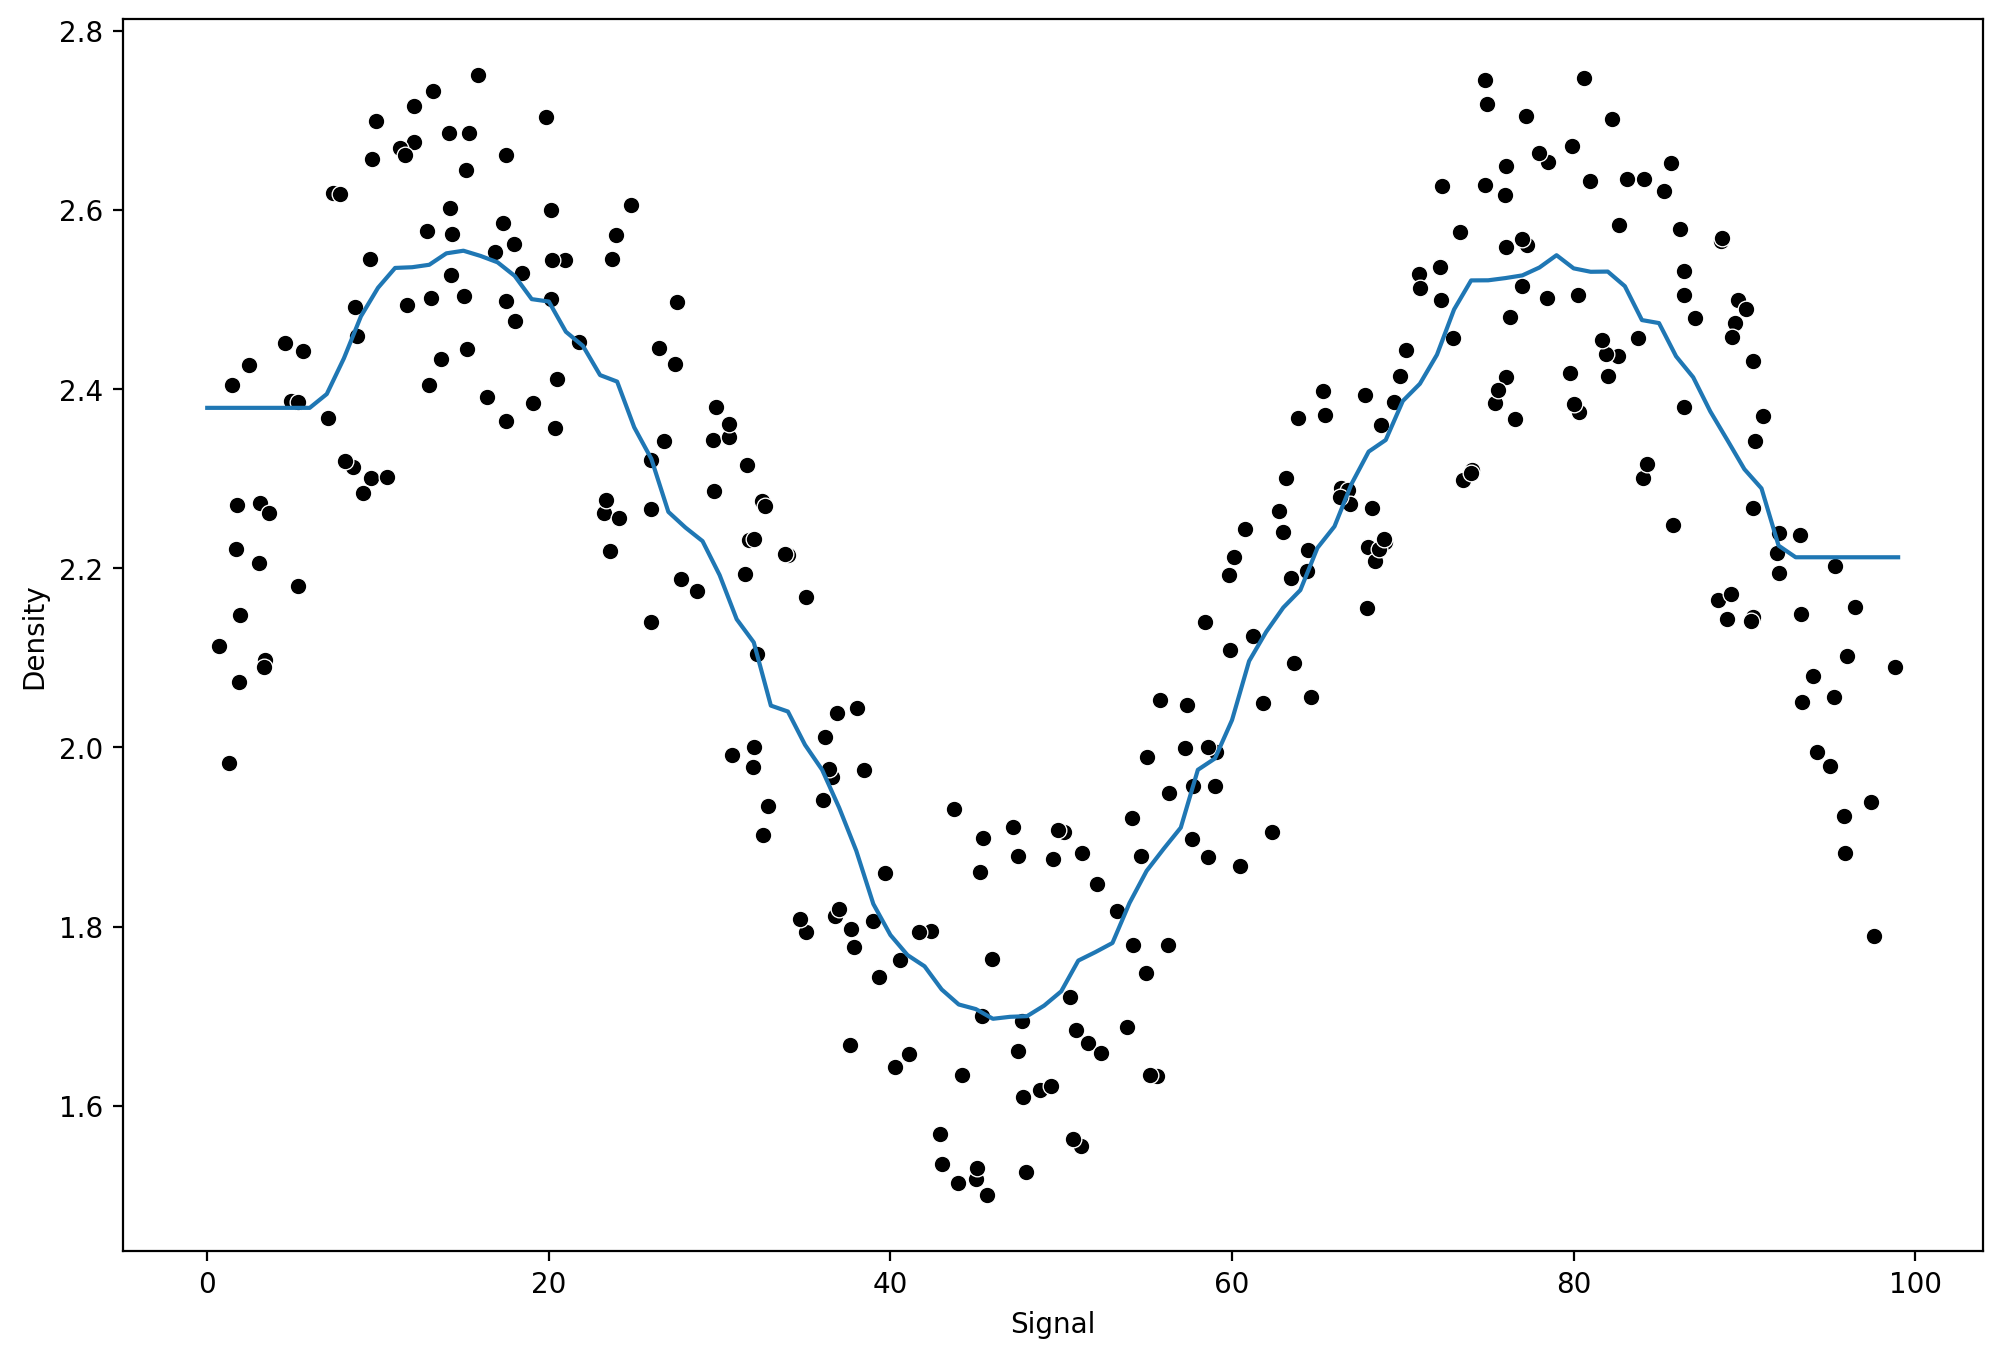

In [74]:
k_values = [1,5,10,30]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [75]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


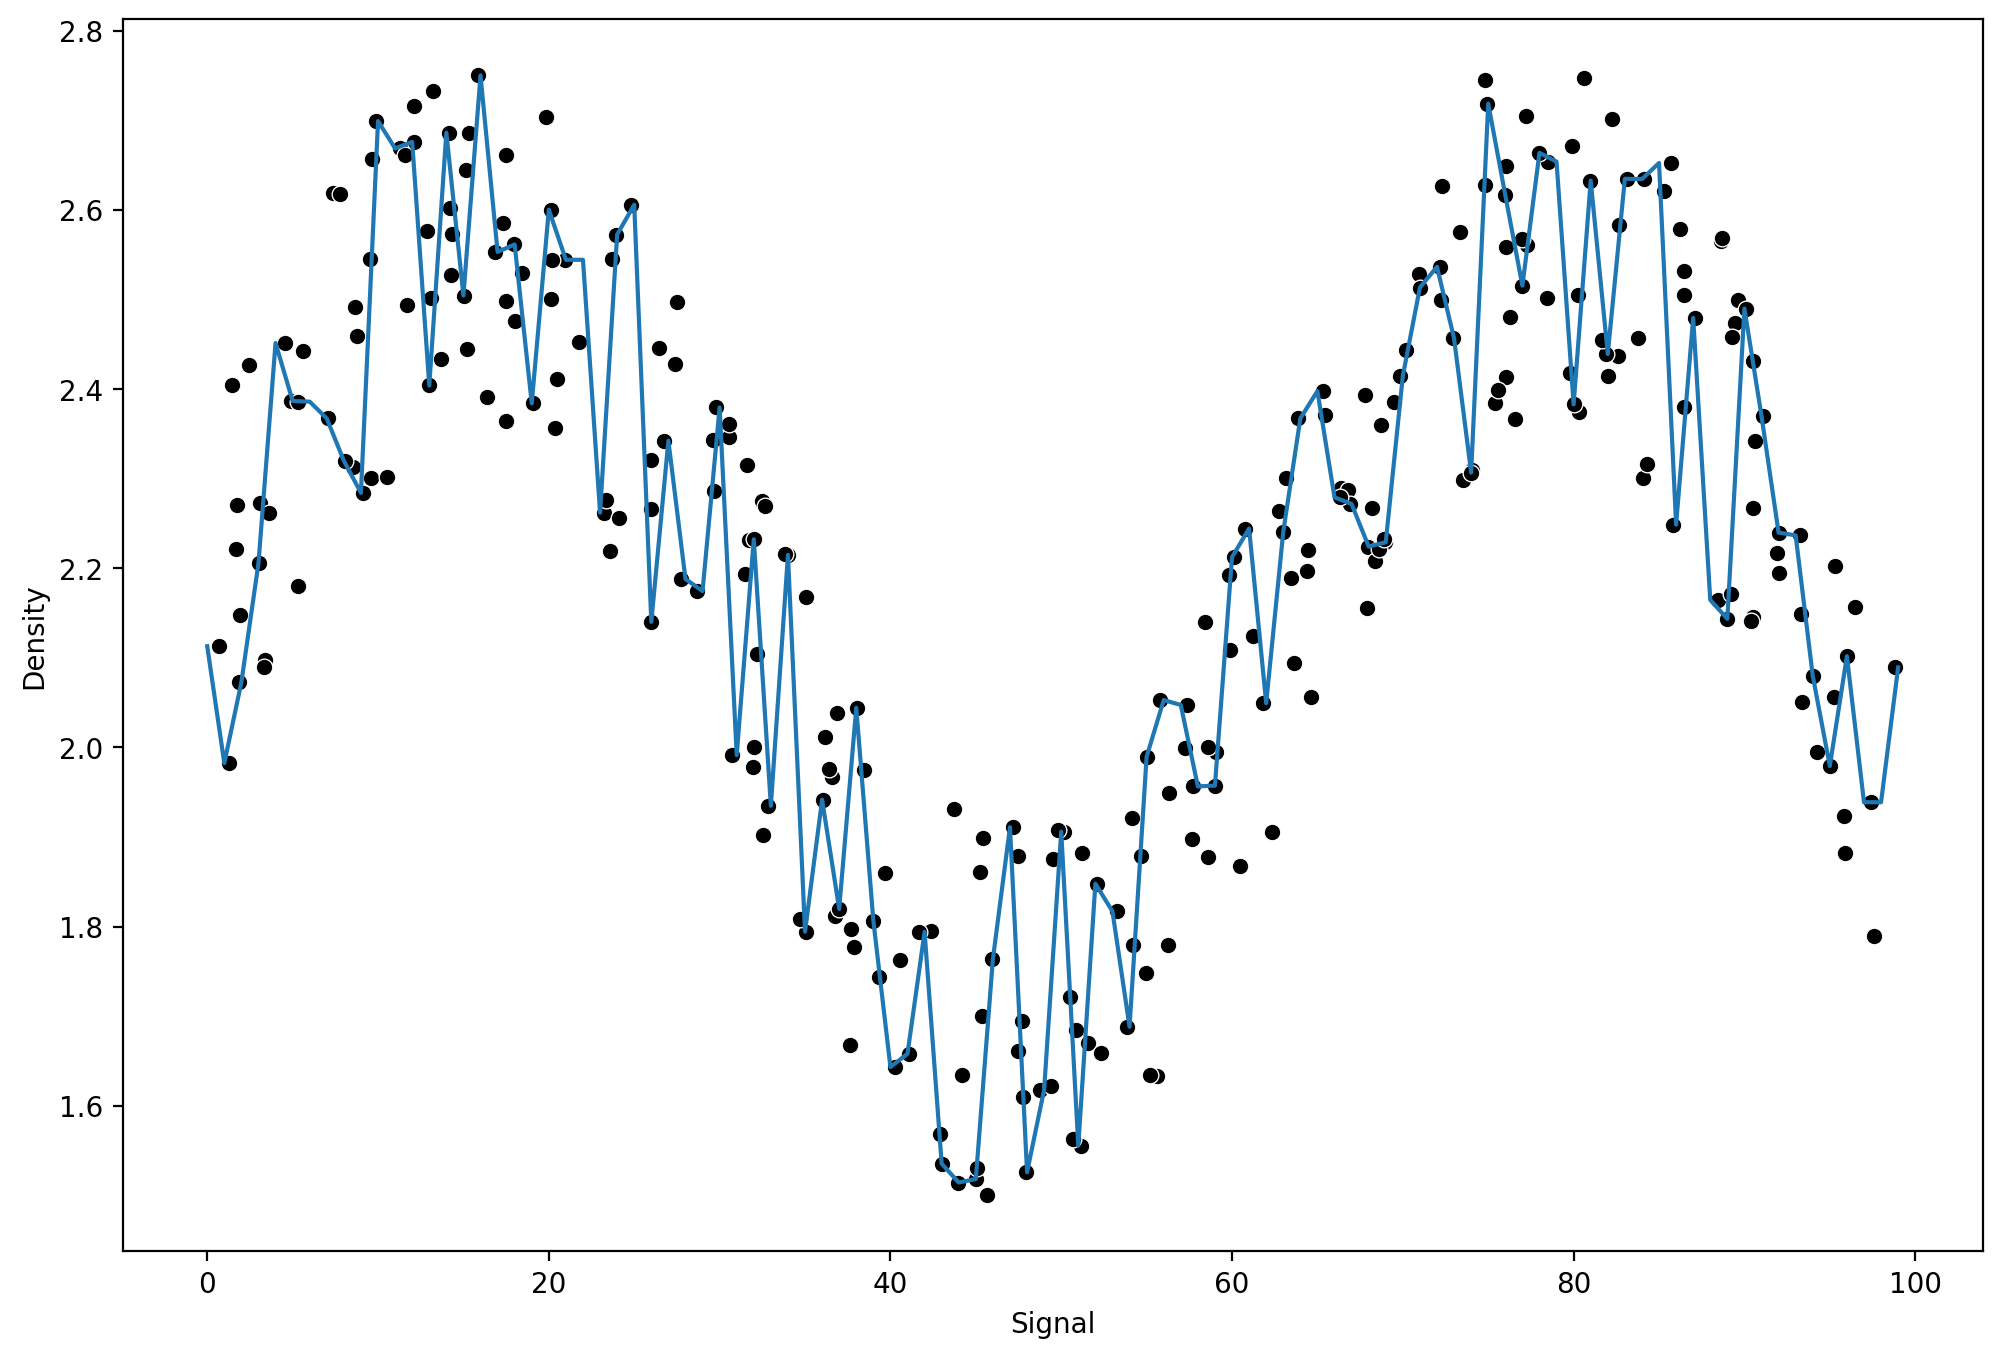

In [76]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [77]:
from sklearn.svm import SVR

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
svr = SVR()

param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
             'gamma':['auto','scale']}

grid = GridSearchCV(svr,param_grid)

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


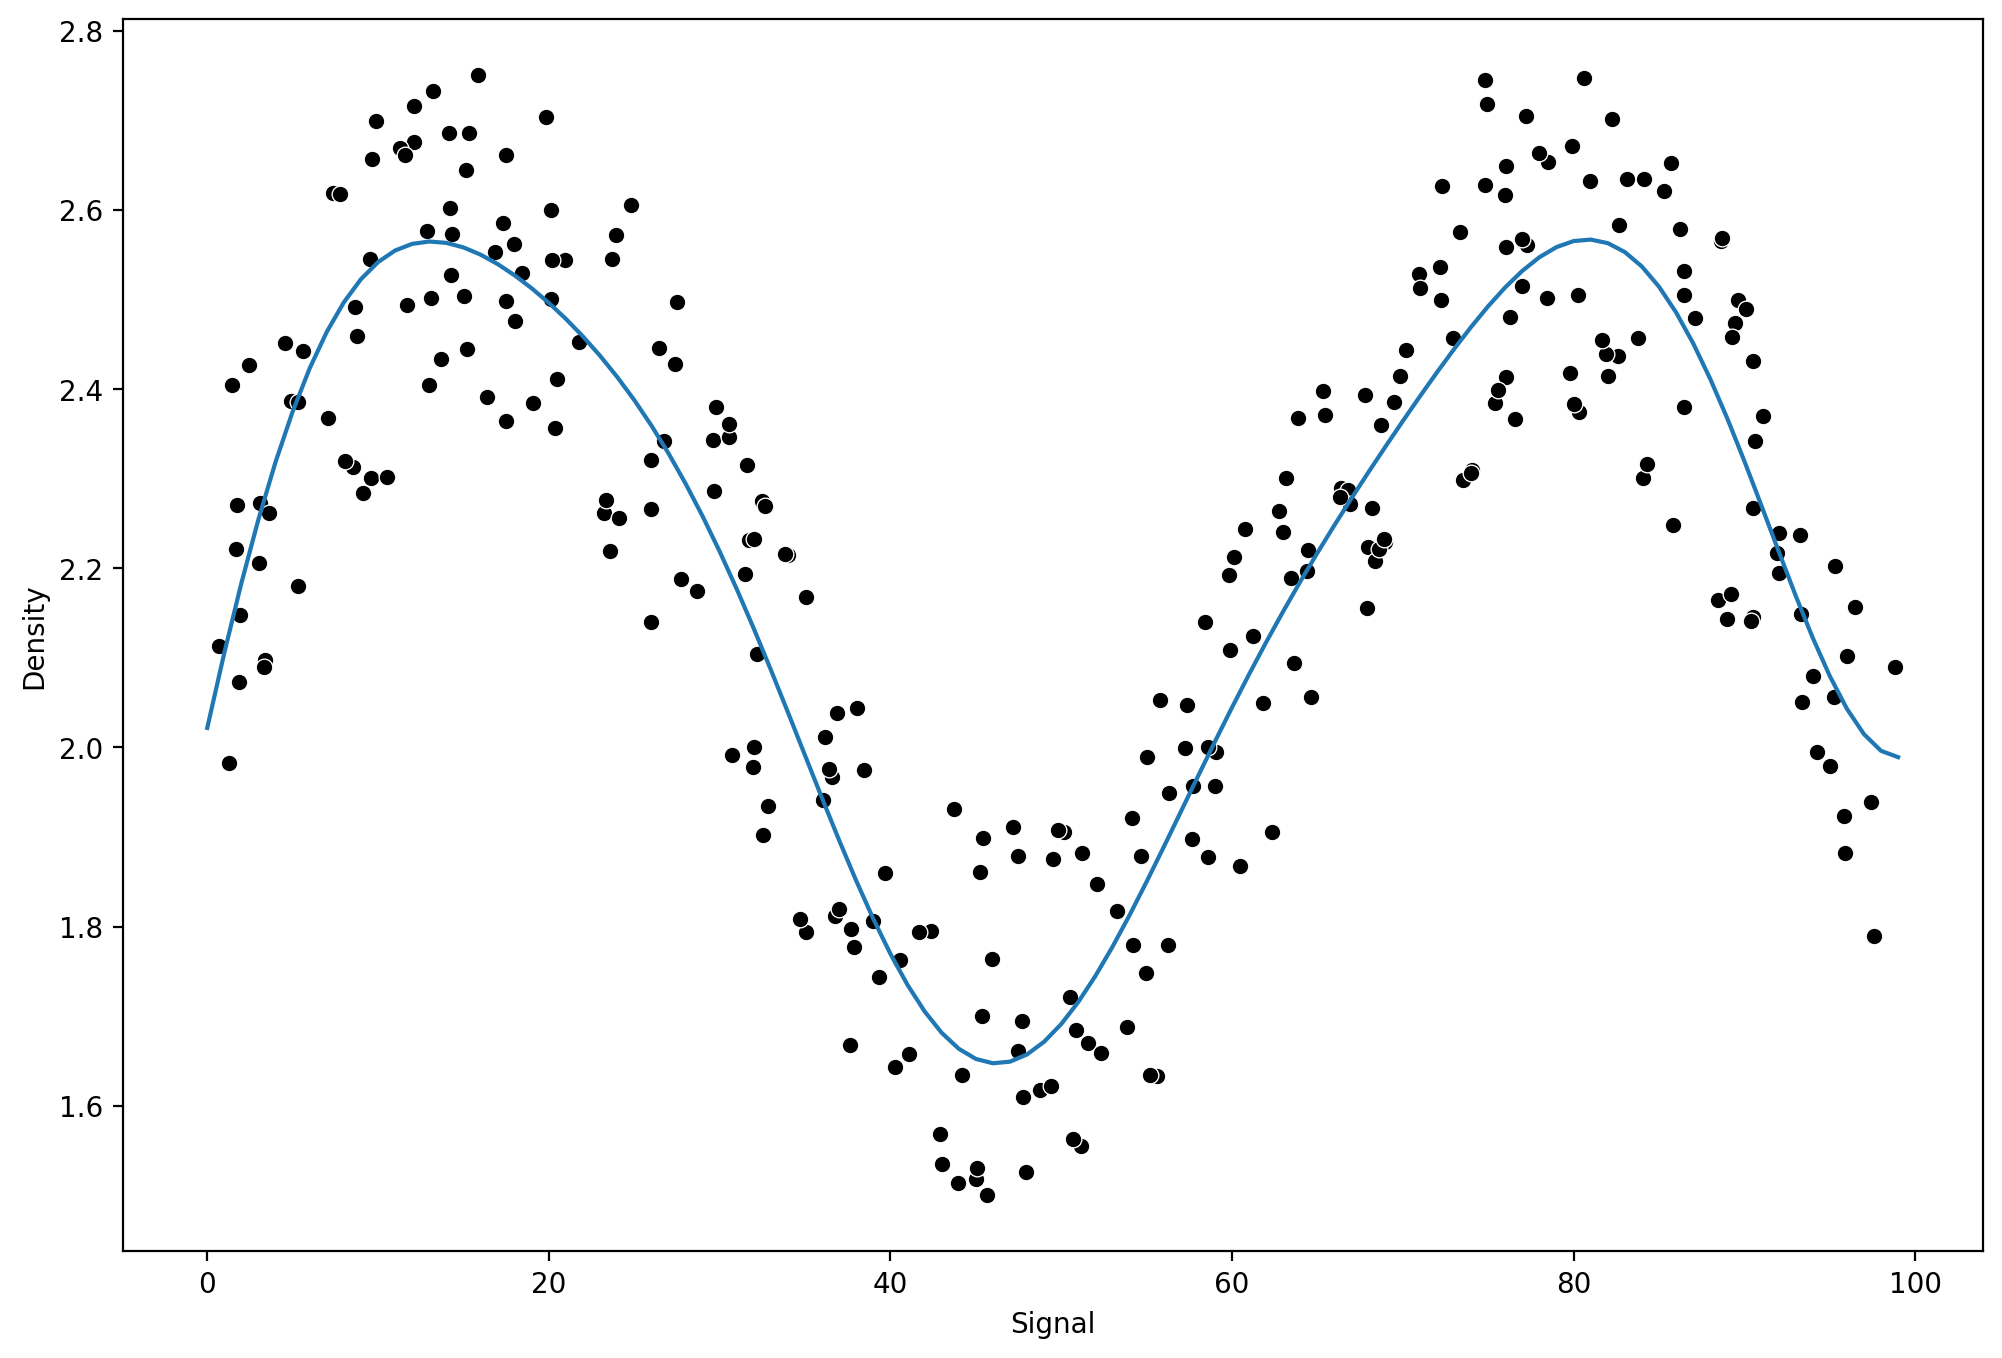

In [80]:
run_model(grid,X_train,y_train,X_test,y_test)

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rfr = RandomForestRegressor(n_estimators=10)

MAE: 0.12021114344794949
RMSE: 0.14375122959913283


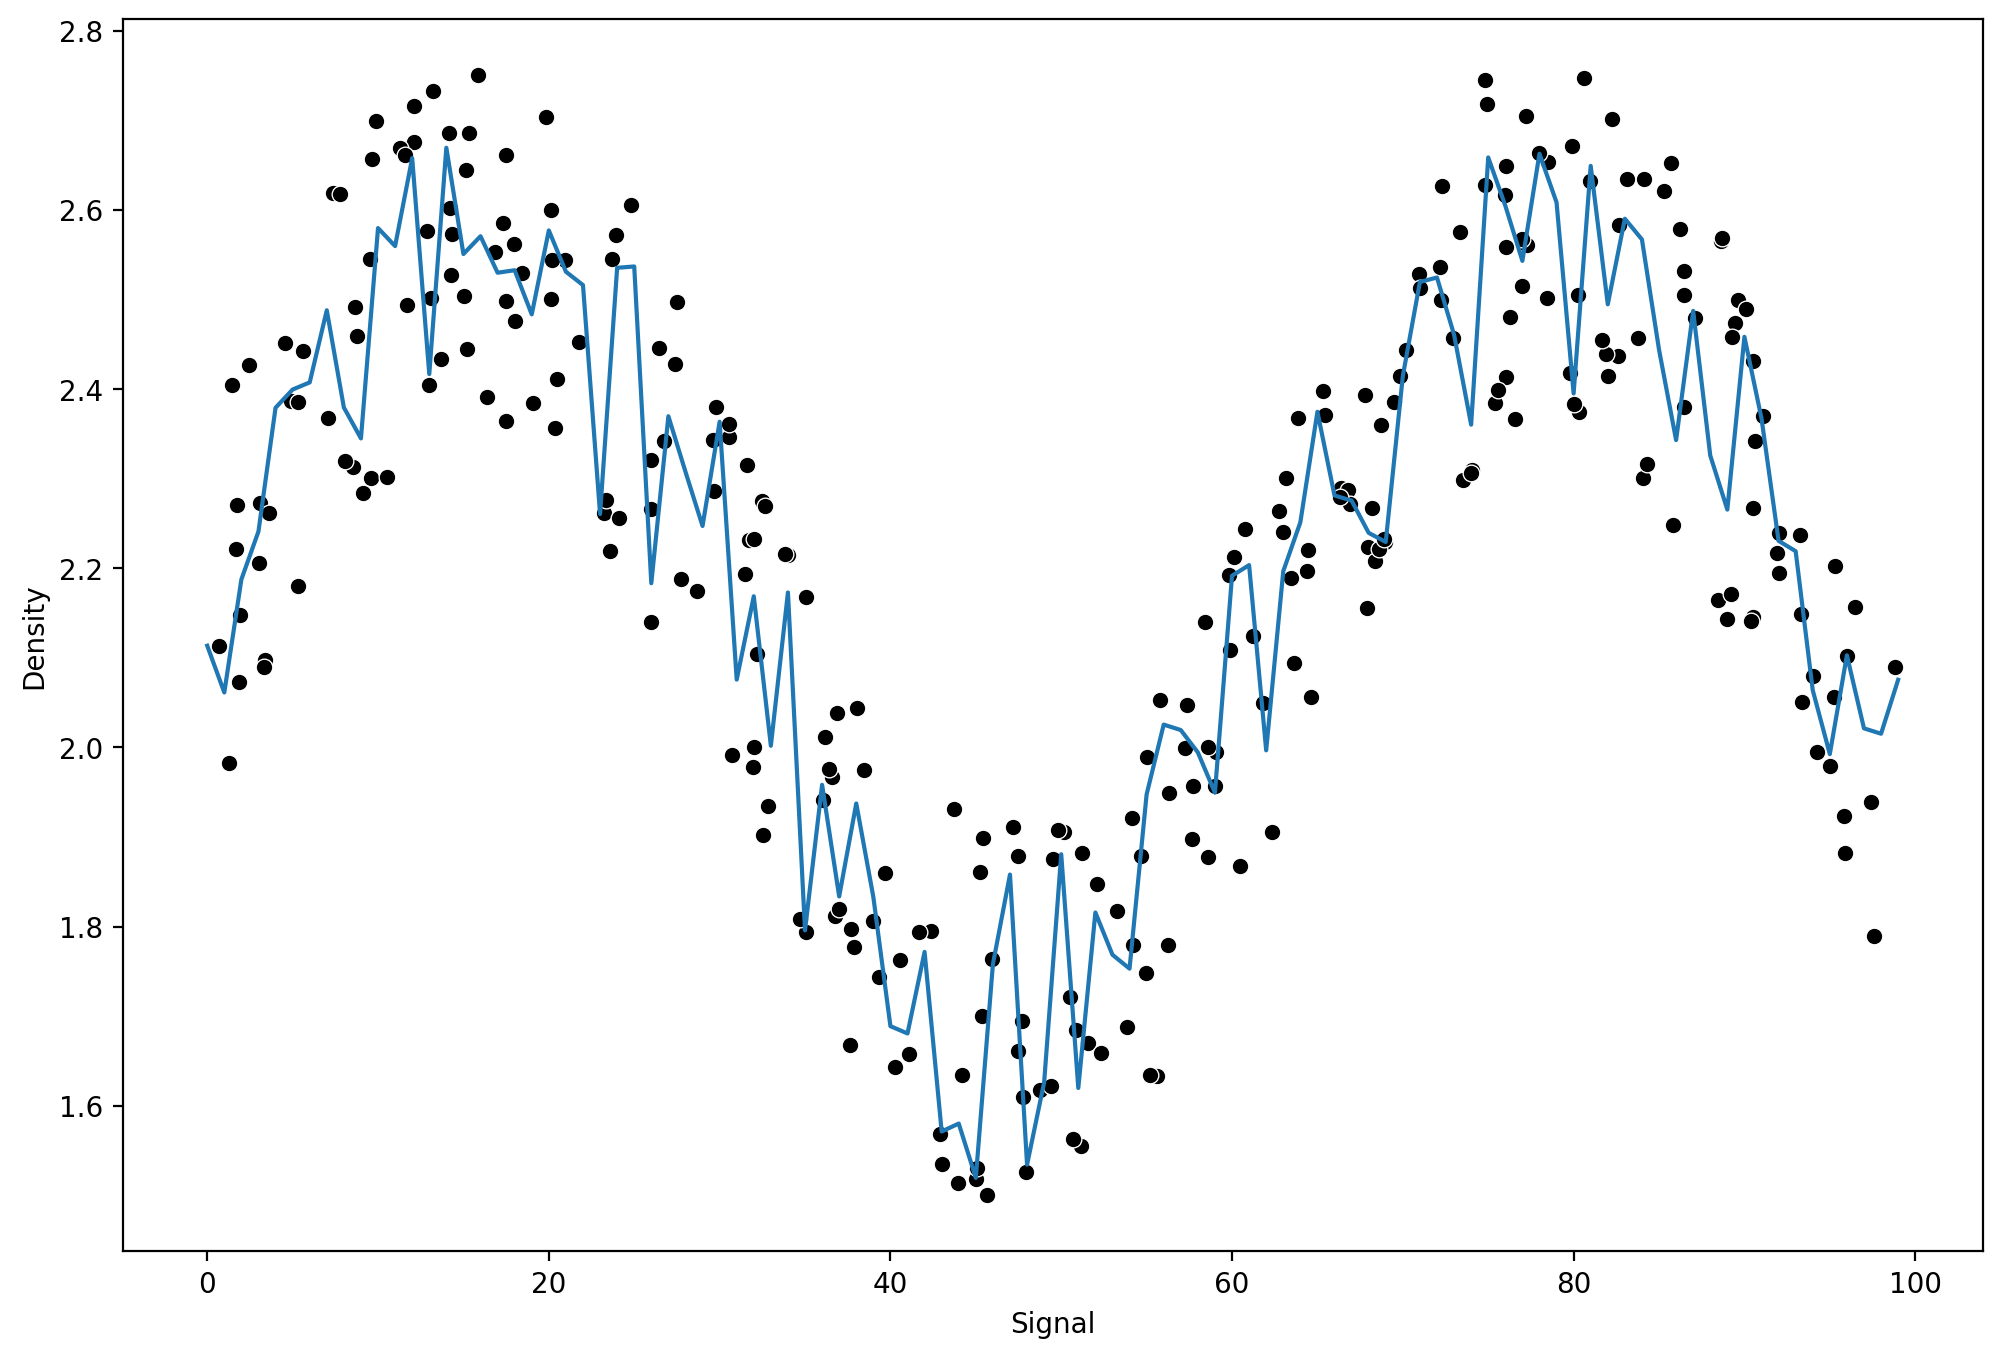

In [83]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [84]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


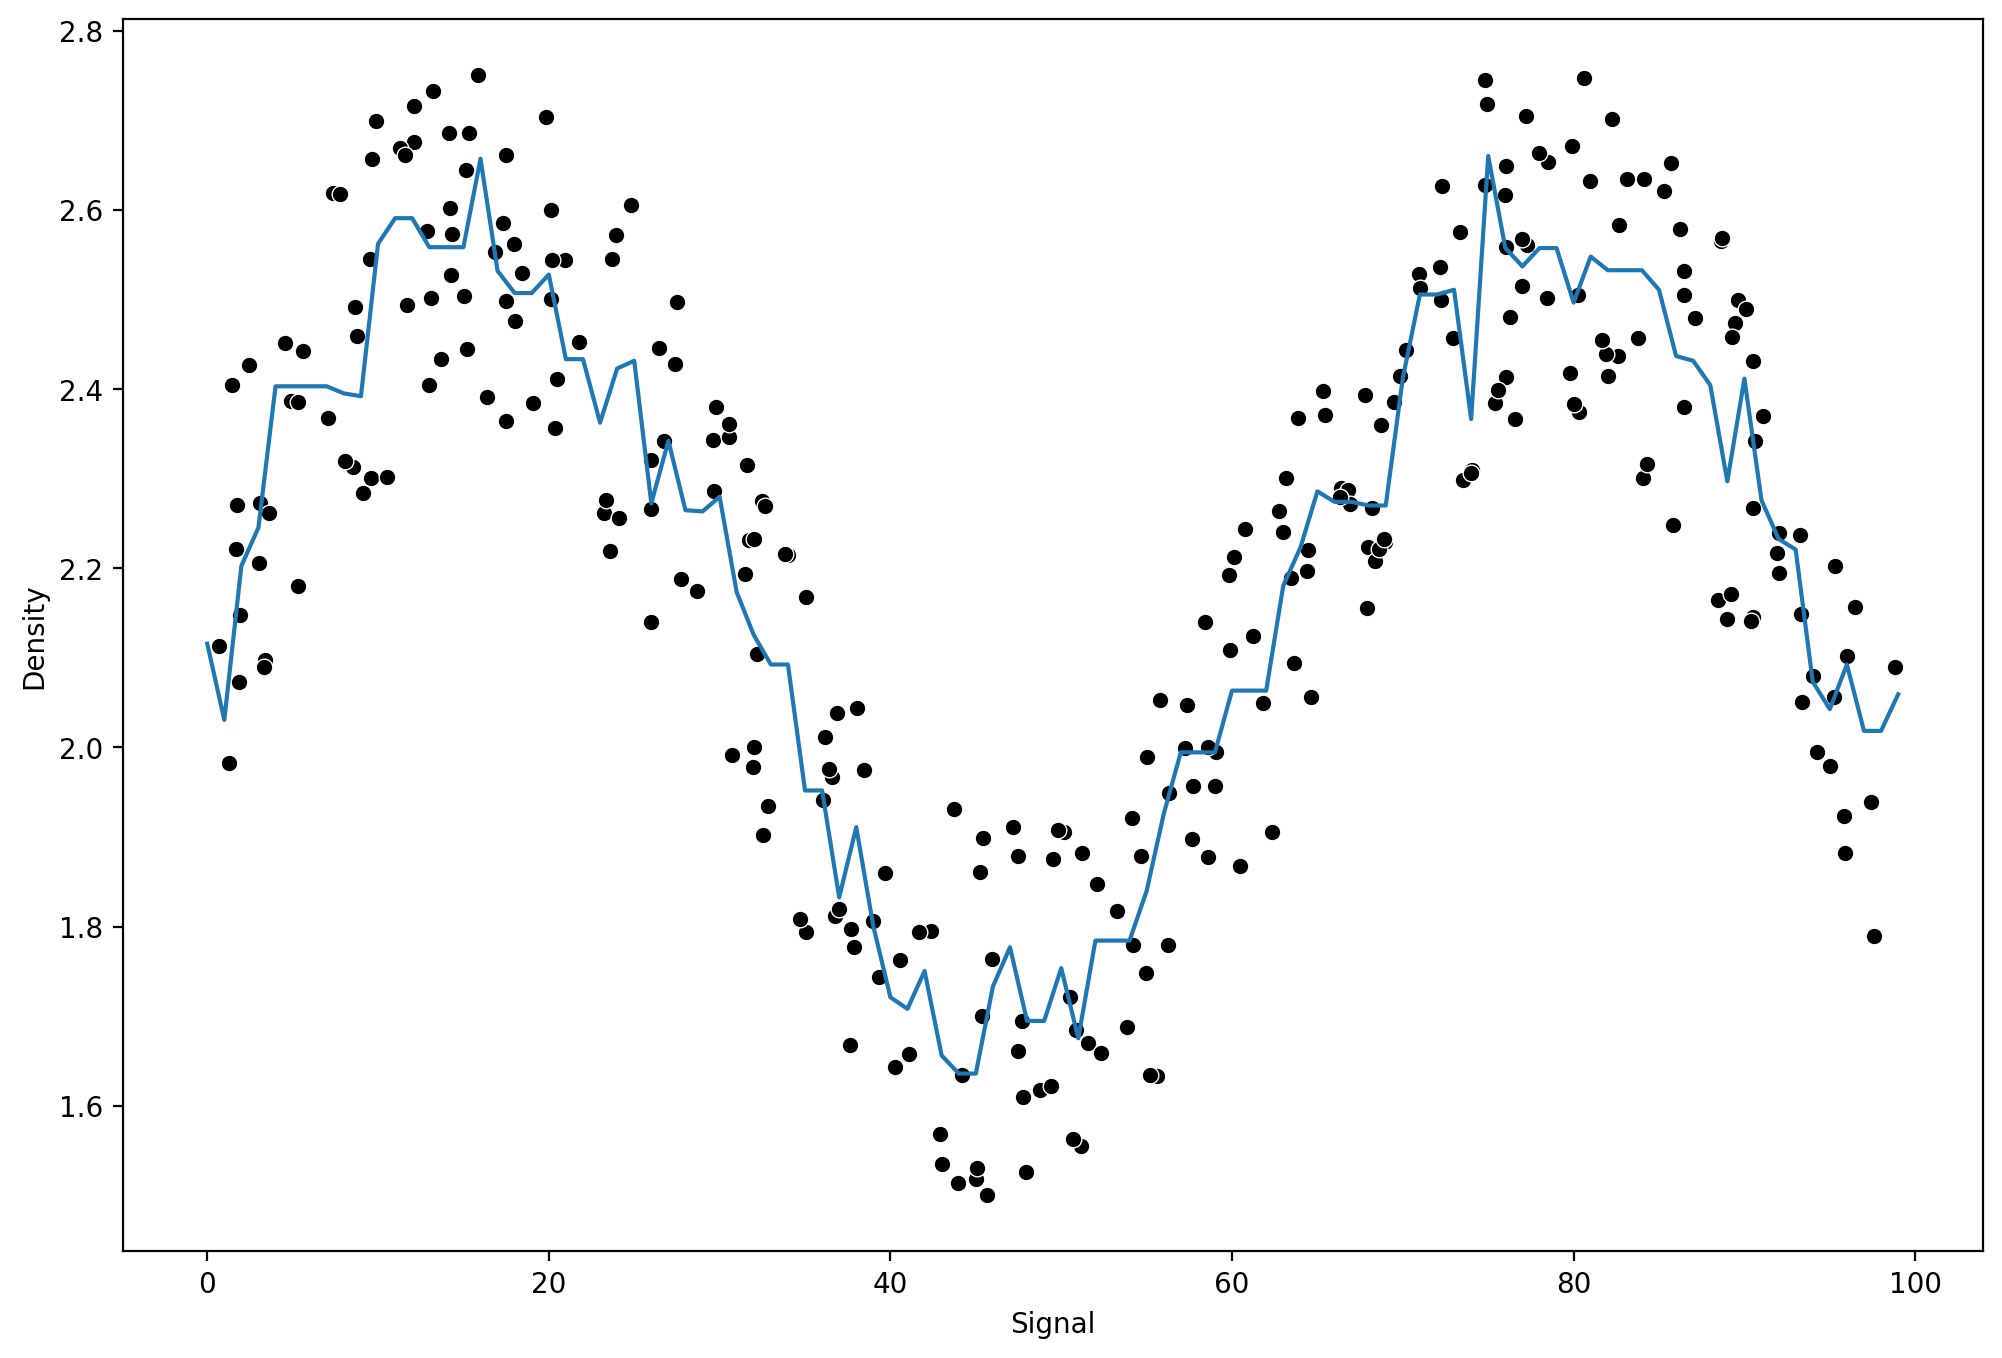

In [85]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

MAE: 0.12251345621721424
RMSE: 0.1393440553458835


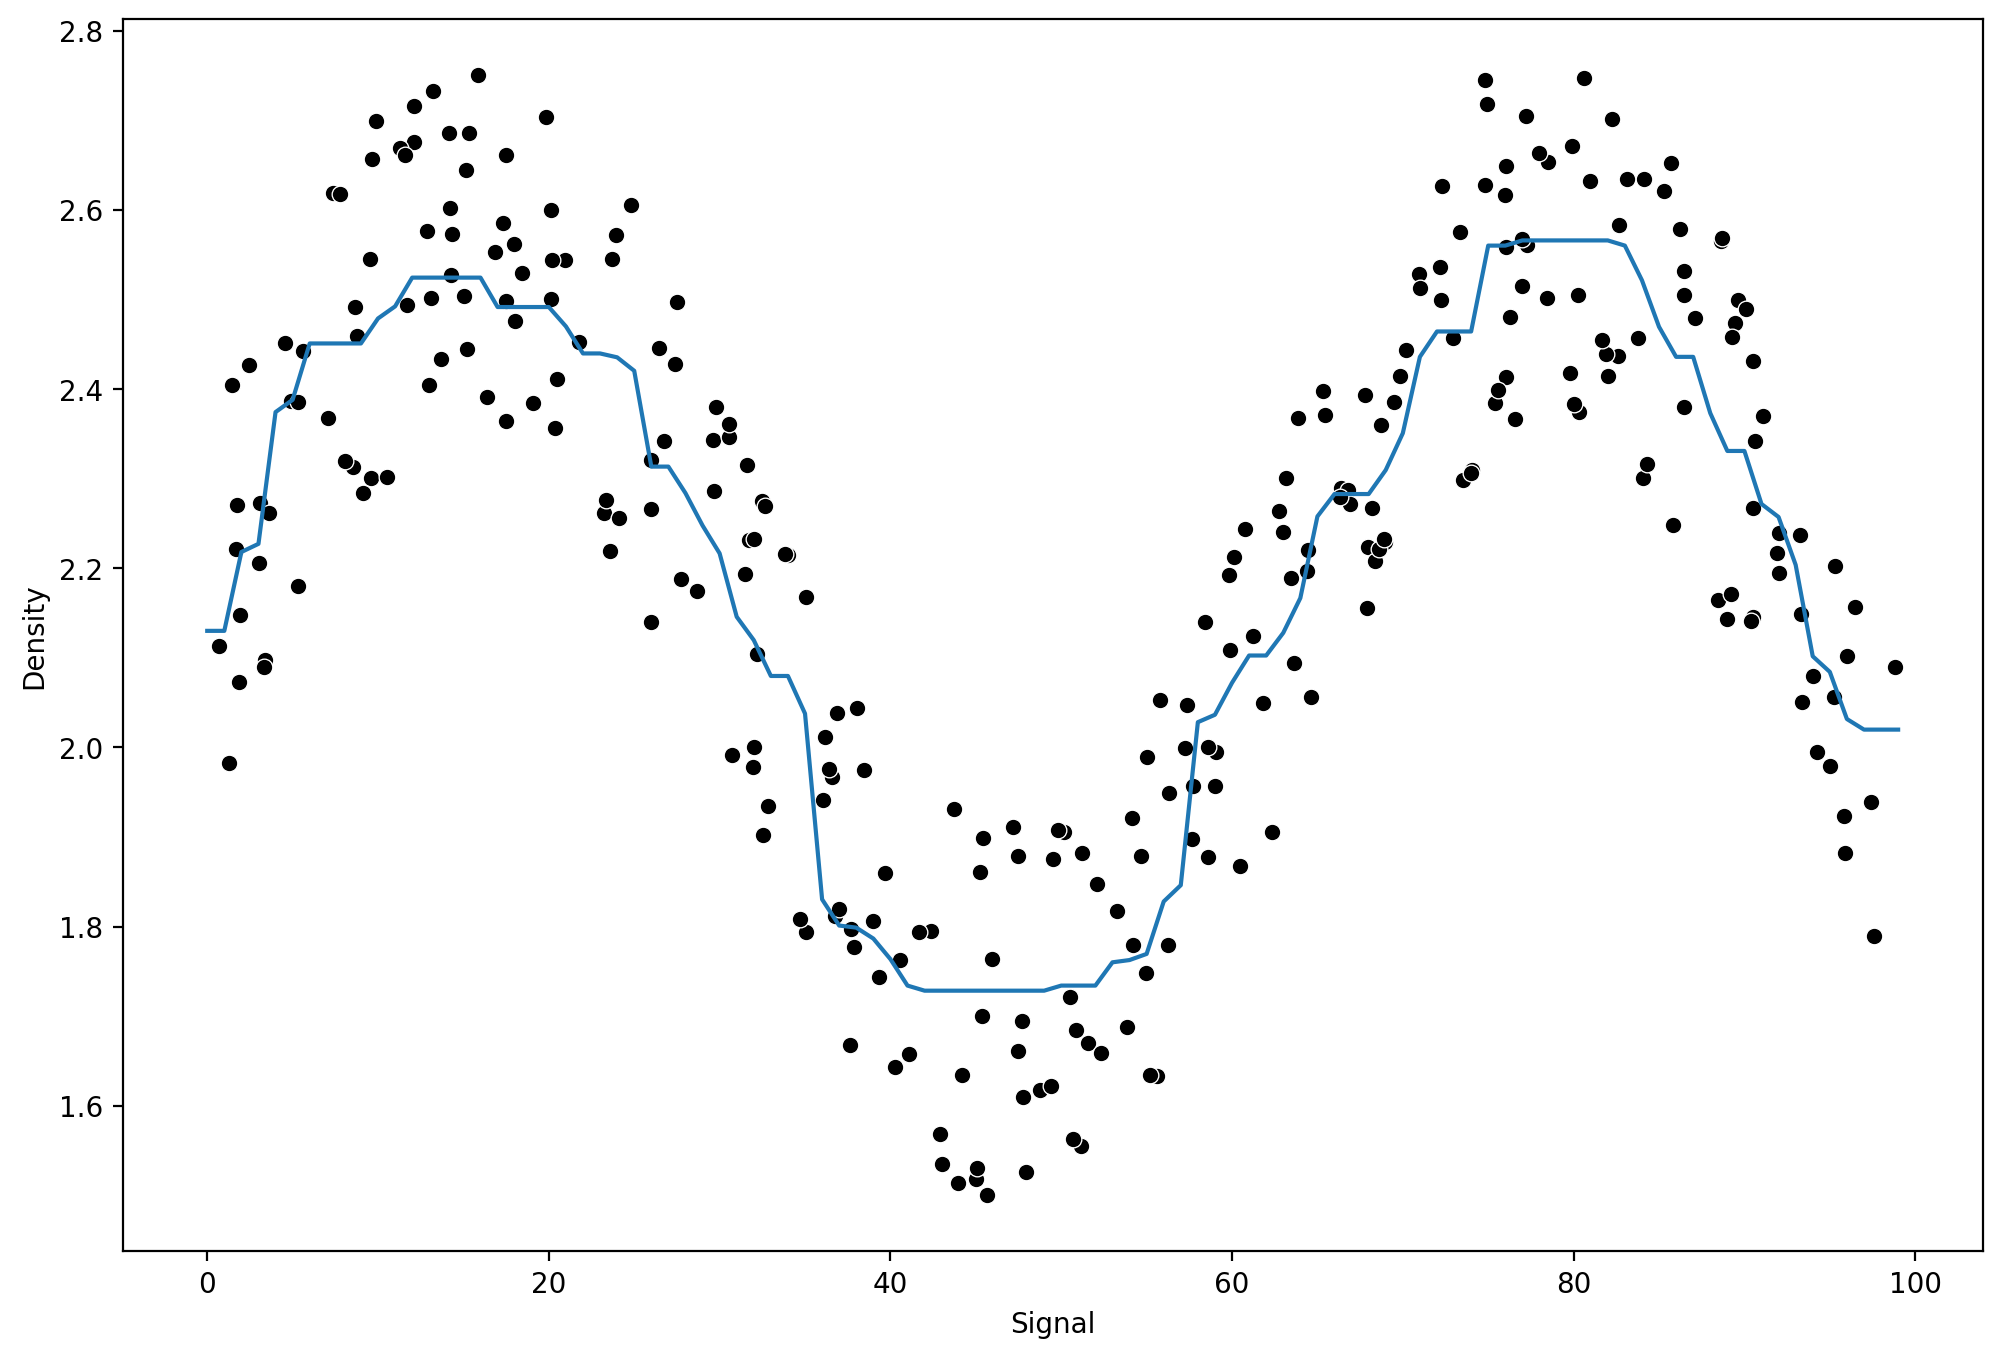

In [86]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)